# Data exploration

In this notebook, we review the dataset to understand what the data represent and the relationship between data elements. This also includes dealing with the null values and defining the preprocessing function.


### Import statements

In [1050]:
pip install --upgrade seaborn

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.2.2 -> 23.3.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1051]:
pip install prettytable

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.2.2 -> 23.3.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1052]:
# Import statements 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.preprocessing import LabelEncoder

### 1° Loading the dataset

In [1053]:
filepath = '../../RFQ_Data_Challenge_HEC.csv'
df = pd.read_csv(filepath)
df.head()

/var/folders/h7/_dgsjjs93hv7lr5ql2ffz2_c0000gn/T/ipykernel_71306/1895652701.py:2: DtypeWarning: Columns (7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


,Deal_Date,ISIN,cusip,Instrument,Sales_Name,Sales_Initial,company_short_name,B_Price,B_Side,Total_Requested_Volume,...,MidYTM,YTWDate,SpreadvsBenchmarkMid,MidASWSpread,MidZSpread,GSpreadMid,MidModifiedDuration,MidConvexity,MidEffectiveDuration,MidEffectiveConvexity
0,2022-09-15,DE000A14J587,D8397TBT2,TKAGR 25/2/2025 2.500,Blanca Tailpied,BLA,Bnp Reunion,0.0,NATIXIS SELL,77551,...,5.57551,NaN,417.014771,286.230682,295.597916,430.414978,2.23491,8.41587,2.11347,6.82874
1,2022-09-15,DE000A14J587,D8397TBT2,TKAGR 25/2/2025 2.500,Blanca Tailpied,BLA,Cegi Ett,0.0,NATIXIS SELL,8163,...,5.57551,NaN,417.014771,286.230682,295.597916,430.414978,2.23491,8.41587,2.11347,6.82874
2,2022-09-15,DE000A14J587,D8397TBT2,TKAGR 25/2/2025 2.500,Blanca Tailpied,BLA,Qbe,0.0,NATIXIS SELL,20408,...,5.57551,NaN,417.014771,286.230682,295.597916,430.414978,2.23491,8.41587,2.11347,6.82874
3,2022-09-15,DE000A14J587,D8397TBT2,TKAGR 2.5% 25 FEB 2025,Blanca Tailpied,BLA,Cegi Ett,0.0,NATIXIS SELL,16327,...,5.57551,NaN,417.014771,286.230682,295.597916,430.414978,2.23491,8.41587,2.11347,6.82874
4,2022-09-15,DE000A14J587,D8397TBT2,TKAGR 2.5% 25 FEB 2025,Constantin Durie,CON,Scp Laureau-Jeannerot,0.0,NATIXIS SELL,244898,...,5.57551,NaN,417.014771,286.230682,295.597916,430.414978,2.23491,8.41587,2.11347,6.82874


In [1054]:
df.ISIN.value_counts()

ISIN
IT0003934657    8582
IT0005441883    4595
IT0005425233    4396
FR0014001NN8    4320
IT0005518128    4191
                ... 
USU2920CAA19       1
XS1637404275       1
XS2078642183       1
US91282CEX56       1
DE000SHFM683       1
Name: count, Length: 9635, dtype: int64

In [1055]:
df.maturity

0         2025-02-25 00:00:00.000
1         2025-02-25 00:00:00.000
2         2025-02-25 00:00:00.000
3         2025-02-25 00:00:00.000
4         2025-02-25 00:00:00.000
                   ...           
635450    2026-04-13 00:00:00.000
635451    2025-01-31 00:00:00.000
635452    2024-07-05 00:00:00.000
635453                       EMEA
635454                     FRANCE
Name: maturity, Length: 635455, dtype: object

In [1056]:
df.Maturity

0         02/25/2025 00:00:00
1         02/25/2025 00:00:00
2         02/25/2025 00:00:00
3         02/25/2025 00:00:00
4         02/25/2025 00:00:00
                 ...         
635450    04/13/2027 00:00:00
635451    01/31/2025 00:00:00
635452    10/05/2024 00:00:00
635453    03/21/2082 00:00:00
635454    11/28/2025 00:00:00
Name: Maturity, Length: 635455, dtype: object

### 2° Defining the preprocessing function

In [1057]:
df.columns

Index(['Deal_Date', 'ISIN', 'cusip', 'Instrument', 'Sales_Name',
       'Sales_Initial', 'company_short_name', 'B_Price', 'B_Side',
       'Total_Requested_Volume', 'Total_Traded_Volume_Natixis',
       'Total_Traded_Volume_Away', 'Total_Traded_Volume',
       'BloomIndustrySector', 'BloomIndustryGroup', 'BloomIndustrySubGroup',
       'cdcissuerShortName', 'cdcissuer', 'Country', 'lb_Platform_2',
       'maturity', 'Rating_Fitch', 'Rating_Moodys', 'Rating_SP', 'Cusip',
       'Ccy', 'Classification', 'Tier', 'Maturity', 'AssumedMaturity',
       'Coupon', 'Frequency', 'Type', 'MidPrice', 'MidYTM', 'YTWDate',
       'SpreadvsBenchmarkMid', 'MidASWSpread', 'MidZSpread', 'GSpreadMid',
       'MidModifiedDuration', 'MidConvexity', 'MidEffectiveDuration',
       'MidEffectiveConvexity'],
      dtype='object')

In [1058]:
df.dtypes

Deal_Date                       object
ISIN                            object
cusip                           object
Instrument                      object
Sales_Name                      object
Sales_Initial                   object
company_short_name              object
B_Price                         object
B_Side                          object
Total_Requested_Volume          object
Total_Traded_Volume_Natixis    float64
Total_Traded_Volume_Away       float64
Total_Traded_Volume            float64
BloomIndustrySector             object
BloomIndustryGroup              object
BloomIndustrySubGroup           object
cdcissuerShortName              object
cdcissuer                       object
Country                         object
lb_Platform_2                   object
maturity                        object
Rating_Fitch                    object
Rating_Moodys                   object
Rating_SP                       object
Cusip                           object
Ccy                      

Insights on some features :
- **Deal_Date** : The date on which a financial deal is executed. Needs to be converteted in datetime.
- **ISIN** : International Securities Identification Number, a unique identifier for Financial instruments.
- **company_short_name** : the name of the issuer of the financial instrument. It corresponds to the client name.
- **B_price** : The bid price of the financial instrument. To be converted to int (object for the moment)
- **B_side** : Natixis's position as a buyer or seller of the financial instrument (for the moment 'NATIXIS SELL' or 'NATIXIS BUY'). Contient 8 valeurs nulles.
- **Total_Requested_Volume** : The requested volume for buying or selling the financial instrument. It needs to be converted into a numerical column (object for the moment). Contient 2 valeurs nulles.
- **Total_Traded_Volume_Natixis** : The volume of the financial instrument traded by Natixis. Already good data type.
- **Total_Traded_Volume_Away** : The volume of the financial instrument traded by other banks. Already good data type.
- **Total_Traded_Volume** : The total volume of the financial instrument traded. Already good data type.
- **BloomIndustrySector**, **BloomIndustryGroup**,**BloomIndustrySubGroup**
- **maturity** : The length of time during which interest is paid. Some null values are marked as NaT. We convert this column into Datetime type. Some maturities go back to 1900, it is not possible. We delete those.
- **Rating_Fitch** : The credit rating of the financial instrument from Fitch Ratings.
- **Rating_Moodys** : The credit rating of the financial instrument from Moody's.
- **Rating_SP** : The credit rating of the financial instrument from S&P Global Ratings.
- **Ccy** : The currency in which the financial instrument is denominated.
- **Classification** : The activity sector of the company.
- **Tier** : The seniority level of the financial instrument. Lots of null value, we replace them by UNKOWN (627100 values)
- **AssumedMaturity** : The assumed maturity date of the financial instrument. Also contains a lot of null values, we replace them by maturity values (the null values only).
- **Coupon** : The interest rate of the financial instrument. Already a float.
- **Frequency** : The frequency of interest payments on the financial instrument. Takes values 1M, 3M, 6M, 12M. We delete the 'M' and convert the value into int.
- **Type** : The type of interest rate on the financial instrument (fixed or variable).
- **MidYTM** : The yield to maturity on the prime bid. Already a float.
- **MidYTM** : The yield to maturity on the prime bid. Already a float.
- **YTWDate** : Yield to Worst - The yield on the first possible redemption date. 
- **SpreadvsBenchmarkMid** : The spread of the financial instrument versus the interpolated government bond curve.
- **MidASWSpread** : The spread of the financial instrument versus the swap curve.
- **MidZSpread** : The spread of the financial instrument versus the zero- coupon curve.
- **GSpreadMid** : The spread of the financial instrument versus the interpolated government bond curve.
- **MidModifiedDuration** : The modified duration of the financial instrument. 
- **MidConvexity** : The convexity of the financial instrument.
- **MidEffectiveDuration** : The effective duration of the financial instrument.
- **MidEffectiveConvexity** : The effective convexity of the financial instrument.

Features that can be deleted at first : 
- **Cusip**, same as **cusip** but with more null values 
- **Maturity**, same as **maturity**

Added columns :
- Year, month, day of deal_date
- Year, month, day of maturity
- days to maturity

In [1059]:
# Null values analysis for columns with null values below 15000
below_threshold = df.isnull().sum().sort_values(ascending=False) < 15000
print("Columns with null values below 15000:")
print(below_threshold[below_threshold].index)

# Null values analysis for columns with null values above 15000
above_threshold = df.isnull().sum().sort_values(ascending=False) >= 15000
print("\nColumns with null values above or equal to 15000:")
print(above_threshold[above_threshold].index)


Columns with null values below 15000:
Index(['Sales_Initial', 'Sales_Name', 'MidYTM', 'Coupon', 'Ccy',
       'BloomIndustryGroup', 'BloomIndustrySector', 'Instrument', 'cusip',
       'maturity', 'cdcissuerShortName', 'Frequency', 'MidPrice', 'cdcissuer',
       'company_short_name', 'BloomIndustrySubGroup', 'B_Price',
       'Classification', 'Total_Traded_Volume_Natixis', 'B_Side',
       'Total_Traded_Volume_Away', 'Total_Requested_Volume',
       'Total_Traded_Volume', 'Type', 'Maturity', 'ISIN', 'Deal_Date'],
      dtype='object')

Columns with null values above or equal to 15000:
Index(['Tier', 'AssumedMaturity', 'YTWDate', 'GSpreadMid',
       'SpreadvsBenchmarkMid', 'Cusip', 'MidEffectiveConvexity',
       'MidEffectiveDuration', 'MidASWSpread', 'Rating_Moodys', 'MidConvexity',
       'Rating_Fitch', 'MidZSpread', 'Rating_SP', 'MidModifiedDuration',
       'Country', 'lb_Platform_2'],
      dtype='object')


In [1060]:
def preprocess_dataframe(df):
    """
    Preprocesses the input DataFrame with the following steps:
    1. Converts 'Deal_Date', 'maturity', 'AssumedMaturity', 'YTWDate' columns to datetime.
    2. Converts 'B_Side' column to boolean (1 for 'NATIXIS BUY', 0 for 'NATIXIS SELL').
    3. Converts 'B_Price' and 'Total_Requested_Volume' columns to integers.
    4. Fills null values in 'Tier', 'AssumedMaturity', and 'YTWDate' columns with 'UNKNOWN'.
    5. Converts 'Frequency' feature values into integers (removing 'M' from the end).
    6. Drops the unsused 'Cusip' column.

    Parameters:
    - df (DataFrame): Input DataFrame.

    Returns:
    - DataFrame: Processed DataFrame.
    """

    df = df.copy()

    # Drop null values only for columns below the threshold
    columns_to_delete_null_vales = ['MidYTM', 'Coupon', 'Ccy', 'cusip',
       'maturity', 'cdcissuerShortName', 'Frequency', 'MidPrice', 'cdcissuer',
       'company_short_name', 'BloomIndustrySubGroup', 'B_Price',
       'Total_Traded_Volume_Natixis', 'B_Side',
       'Total_Traded_Volume_Away', 'Total_Requested_Volume',
       'Total_Traded_Volume', 'Type', 'Maturity', 'ISIN', 'Deal_Date']
    df = df.dropna(subset=columns_to_delete_null_vales)

    # Convert 'B_Price', 'Total_Requested_Volume', 'Frequency' to integers
    df['Frequency'] = df['Frequency'].str.replace('M', '')
    numerical_columns = ['B_Price', 'Total_Requested_Volume', 'Frequency']
    df.dropna(subset=numerical_columns, inplace=True)
    for column in numerical_columns:
        df[column] = pd.to_numeric(df[column], errors='coerce').astype(int)

    # Fix the error in the B_Price column
    df = df[df['B_Price'] >= 20]

    # Replace NaT with null values in the 'Maturity' column
    df['maturity'].replace({pd.NaT: np.nan}, inplace=True)

    # Convert 'Deal_Date', 'maturity', 'AssumedMaturity', 'YTWDate' to datetime
    df['Deal_Date'] = pd.to_datetime(df['Deal_Date'])
    df['maturity'] = pd.to_datetime(df['maturity'], errors='coerce',  format='%Y-%m-%d %H:%M:%S.%f')
    df['AssumedMaturity'] = pd.to_datetime(df['AssumedMaturity'], errors='coerce')
    df['YTWDate'] = pd.to_datetime(df['YTWDate'], errors='coerce')

    # Add year, month, day for clustering 
    df['Year_dealdate'] = df['Deal_Date'].dt.year
    df['Month_dealdate'] = df['Deal_Date'].dt.month
    df['Day_dealdate'] = df['Deal_Date'].dt.day
    df['Year_maturity'] = df['maturity'].dt.year
    df['Month_maturity'] = df['maturity'].dt.month
    df['Day_maturity'] = df['maturity'].dt.day

    # Delete maturities smaller than 2021 (as deal dates starts in 2021)
    df = df[df['maturity'].dt.year >= 2021]

    # Compute number of days between maturity and deal date
    df['Days_to_Maturity'] = (df['maturity'] - df['Deal_Date']).dt.days

    # Replace null values in 'AssumedMaturity' with values from 'Maturity'
    df['AssumedMaturity'] = df['AssumedMaturity'].fillna(df['Maturity'])

    # Convert 'B_Side' column to boolean (1 for 'NATIXIS BUY', 0 for 'NATIXIS SELL')
    df = df[df['B_Side'].isin(['NATIXIS SELL', 'NATIXIS BUY'])]
    df['B_Side'] = df['B_Side'].replace({'NATIXIS BUY': 1, 'NATIXIS SELL': 0})

    # Convert null values of 'Tier'
    df['Tier'].fillna('UNKNOWN', inplace=True)

    # Lower string names 
    df['Sales_Name'] = df['Sales_Name'].str.lower()
    df['company_short_name'] = df['company_short_name'].str.lower()

    # Clean Ratings 
    df['Rating_Moodys'] = df['Rating_Moodys'].str.replace('(P)', '')

    # Drop unused columns
    columns_to_drop = ['Cusip', 'Maturity']
    df.drop(columns=columns_to_drop, inplace=True)

    return df

In [1061]:
df_preprocessed = preprocess_dataframe(df)
df_preprocessed.head()

,Deal_Date,ISIN,cusip,Instrument,Sales_Name,Sales_Initial,company_short_name,B_Price,B_Side,Total_Requested_Volume,...,MidConvexity,MidEffectiveDuration,MidEffectiveConvexity,Year_dealdate,Month_dealdate,Day_dealdate,Year_maturity,Month_maturity,Day_maturity,Days_to_Maturity
6,2022-11-10,NL0011220108,EK8199722,NETHER 0.25% 15 JUL 2025,heddy kerneves,HED,banque populaire de l'ouest,95,1,13061,...,10.181840,2.47743,8.883440,2022,11,10,2025.0,7.0,15.0,978
7,2022-11-10,NL0011220108,EK8199722,NETHER 0.25% 15 JUL 2025,ian prechais,IAN,license de transport,95,0,136,...,10.181840,2.47743,8.883440,2022,11,10,2025.0,7.0,15.0,978
8,2022-11-10,NL0011220108,EK8199722,NETHER 0.25% 15 JUL 2025,ian prechais,IAN,bp val de france,95,0,1224490,...,10.181840,2.47743,8.883440,2022,11,10,2025.0,7.0,15.0,978
9,2022-11-10,NL0011220108,EK8199722,NETHER 0.25% 15 JUL 2025,elisene arslane,ELI,hsbc,95,0,91837,...,10.181840,2.47743,8.883440,2022,11,10,2025.0,7.0,15.0,978
12,2023-10-18,IT0005530032,ZM3378175,BTPS 4.45% 01 SEP 2043,ian prechais,IAN,societe generale mer,92,0,2041,...,212.362656,11.40296,192.445251,2023,10,18,2043.0,9.0,1.0,7258


In [1062]:
df_preprocessed.shape

(314718, 49)

Once we've corrected the B_price error, which sometimes corresponds to yield values (by setting a minimum value of 20), only 314718 lines remain.

### 3° Quick EDA

In [1063]:
df_preprocessed.ISIN.value_counts()

ISIN
IT0003934657    8333
IT0005441883    4212
IT0005425233    4190
FR0014001NN8    4033
IT0005518128    3980
                ... 
XS2194373077       1
XS1377237869       1
SK4120008954       1
XS2182054887       1
XS1218319702       1
Name: count, Length: 4918, dtype: int64

In [1064]:
df_preprocessed.columns

Index(['Deal_Date', 'ISIN', 'cusip', 'Instrument', 'Sales_Name',
       'Sales_Initial', 'company_short_name', 'B_Price', 'B_Side',
       'Total_Requested_Volume', 'Total_Traded_Volume_Natixis',
       'Total_Traded_Volume_Away', 'Total_Traded_Volume',
       'BloomIndustrySector', 'BloomIndustryGroup', 'BloomIndustrySubGroup',
       'cdcissuerShortName', 'cdcissuer', 'Country', 'lb_Platform_2',
       'maturity', 'Rating_Fitch', 'Rating_Moodys', 'Rating_SP', 'Ccy',
       'Classification', 'Tier', 'AssumedMaturity', 'Coupon', 'Frequency',
       'Type', 'MidPrice', 'MidYTM', 'YTWDate', 'SpreadvsBenchmarkMid',
       'MidASWSpread', 'MidZSpread', 'GSpreadMid', 'MidModifiedDuration',
       'MidConvexity', 'MidEffectiveDuration', 'MidEffectiveConvexity',
       'Year_dealdate', 'Month_dealdate', 'Day_dealdate', 'Year_maturity',
       'Month_maturity', 'Day_maturity', 'Days_to_Maturity'],
      dtype='object')

In [1065]:
df_preprocessed.company_short_name.value_counts()

company_short_name
societe generale mer                          87953
cegi ett                                      38541
credit agricole centre loire entreprises      21085
hsbc                                          14932
bnp reunion                                   10283
                                              ...  
mr jean-jacques bondroit                        127
ce idf                                           87
crcam                                            83
caisse d'epargne d'auvergne et du limousin       81
bp2l                                             45
Name: count, Length: 89, dtype: int64

In [1066]:
df_preprocessed.BloomIndustrySector.value_counts()

BloomIndustrySector
Government         289588
Financial           20728
Industrial           1170
Utilities            1073
Basic Materials       832
Communications        797
Energy                242
Technology            238
Diversified            17
Name: count, dtype: int64

In [1067]:
# Print null values
df_preprocessed.isnull().sum().sort_values(ascending=False)

YTWDate                        308252
GSpreadMid                     231918
SpreadvsBenchmarkMid           229476
lb_Platform_2                    7555
Country                          7555
MidASWSpread                     7206
Rating_SP                        4473
Rating_Fitch                     4462
Rating_Moodys                    3233
MidEffectiveConvexity            2413
MidEffectiveDuration             2409
MidConvexity                     1756
MidZSpread                       1588
MidModifiedDuration              1389
Sales_Initial                     888
Sales_Name                        888
Instrument                        788
BloomIndustrySector                33
BloomIndustryGroup                 33
Classification                      2
MidYTM                              0
Deal_Date                           0
Type                                0
Year_dealdate                       0
Month_dealdate                      0
Day_dealdate                        0
Year_maturit

We remark that some columns have more than 50% null values : YTWDate, GSpreadMid, SpreadvsBenchmarkMid.

In [1068]:
df_government = df_preprocessed[df_preprocessed['BloomIndustrySector']=='Government'].copy()
df_government = df_government[['YTWDate', 'SpreadvsBenchmarkMid', 'GSpreadMid']]
print('Number of government bonds : ', df_government.shape[0])
print('Null values in government bonds : ')
print(df_government.isnull().sum().sort_values(ascending=False))

Number of government bonds :  289588
Null values in government bonds : 
YTWDate                 289570
SpreadvsBenchmarkMid    229464
GSpreadMid              229285
dtype: int64


Of the zero values in the YTWDate column, almost 100% correspond to government bonds. One possible reason is that government bonds can be issued without an early redemption clause, meaning that there is no date on which the issuer can redeem the bond before maturity. In this case, the YTWDate column would have no significant value and could be left blank.

A. **Deal_Date analysis**

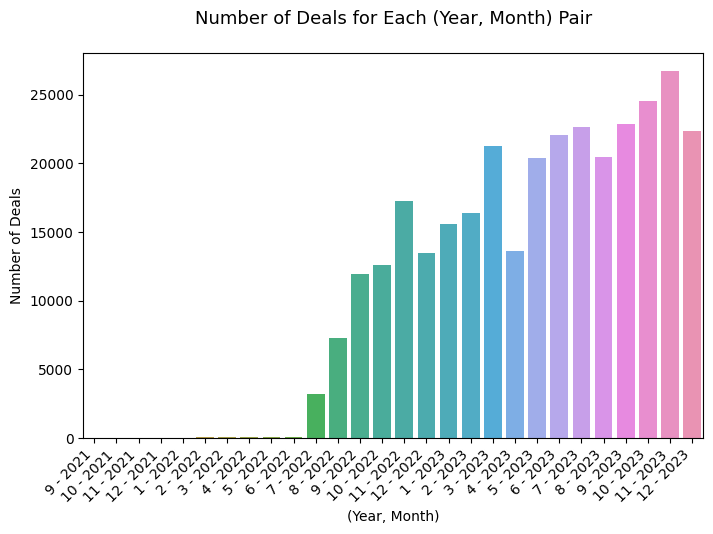

In [1069]:
# Extract year and month from 'Deal_Date'
counts_df = df_preprocessed.groupby(['Year_dealdate', 'Month_dealdate']).size().reset_index(name='Counts')
counts_df['Month_Year_dealdate'] = counts_df['Month_dealdate'].astype(str) + ' - ' + counts_df['Year_dealdate'].astype(str)

# Plot the histogram
plt.figure(figsize=(8, 5))
ax = sns.barplot(x='Month_Year_dealdate', y='Counts', data=counts_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.title('Number of Deals for Each (Year, Month) Pair\n', fontsize=13)
plt.xlabel('(Year, Month)')
plt.ylabel('Number of Deals')
plt.show()

A. **maturity analysis**

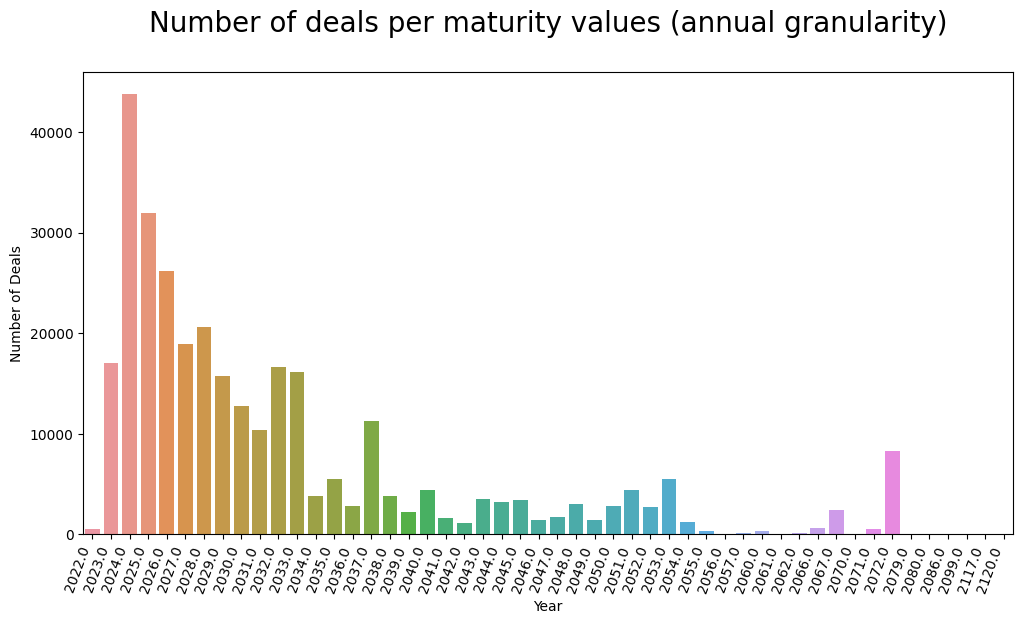

In [1070]:
df_maturity = df_preprocessed.dropna(subset=['maturity'], inplace=False)
df_maturity = df_maturity.groupby('Year_maturity').size().reset_index(name='Counts')
df_maturity.sort_values(by='Year_maturity', ascending=True)

# Plot the histogram
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Year_maturity', y='Counts', data=df_maturity)
ax.set_xticklabels(ax.get_xticklabels(), rotation=70, ha='right')
plt.title('Number of deals per maturity values (annual granularity)\n', fontsize=20)
plt.xlabel('Year')
plt.ylabel('Number of Deals')
plt.show()

C. **company_short_name analysis**

In [1071]:
number_of_comp = len(df_preprocessed.company_short_name.values)
print("Number of companies : ", number_of_comp)

Number of companies :  314718


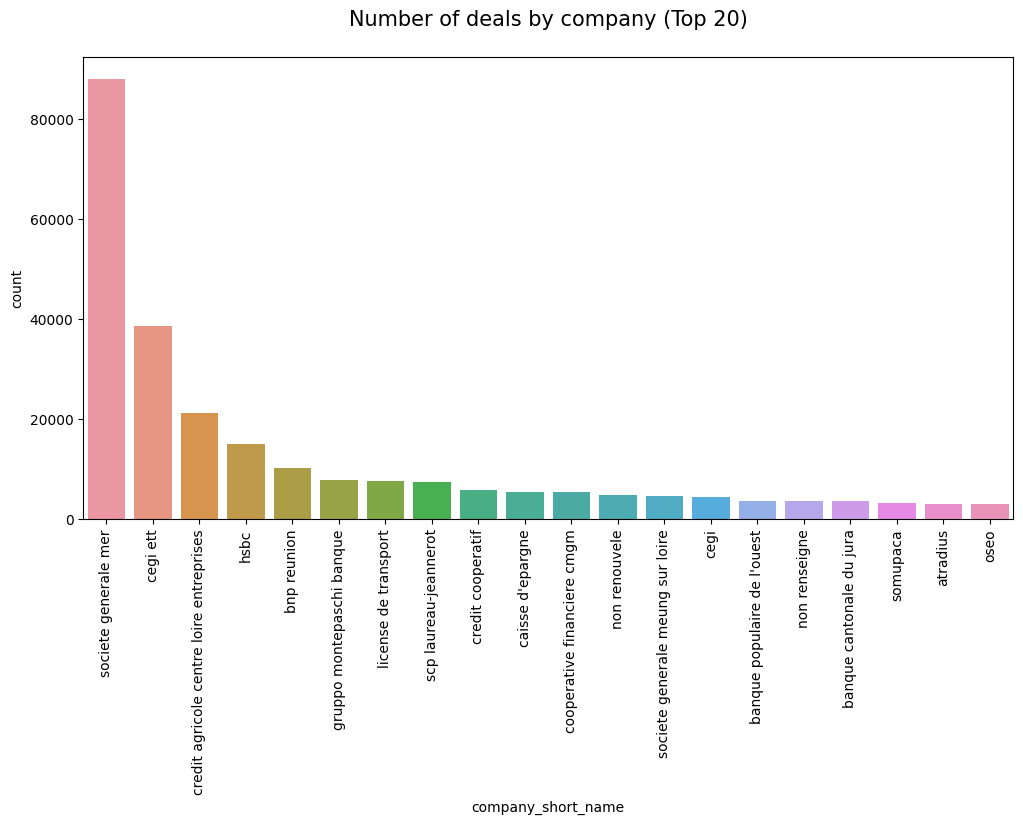

In [1072]:
# Histogramme du nombre de deals par company_short_name (top 20)
plt.figure(figsize=(12, 6))
top_20_companies = df_preprocessed['company_short_name'].value_counts().head(20)
sns.countplot(x='company_short_name', data=df_preprocessed, order=top_20_companies.index)
plt.title('Number of deals by company (Top 20)\n', fontsize=15)
plt.xticks(rotation=90)
plt.show()


D. **B_Sides analysis**

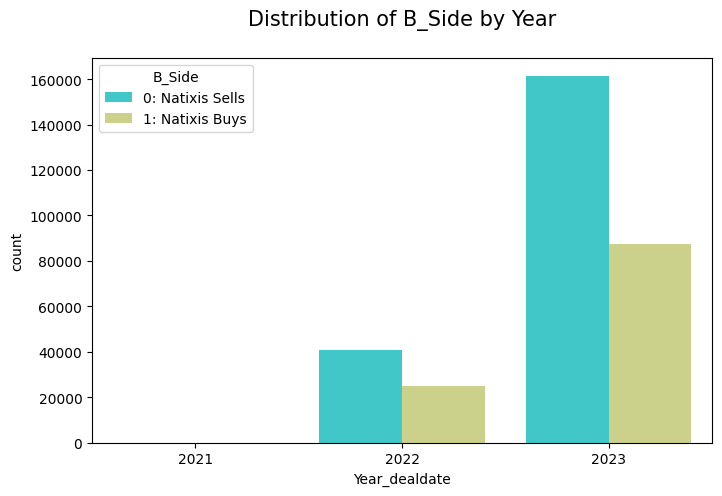

In [1073]:
plt.figure(figsize=(8, 5))
palette = sns.color_palette("rainbow", n_colors=2)
sns.countplot(x='Year_dealdate', hue='B_Side', data=df_preprocessed, palette=palette)
plt.legend(title='B_Side', labels=['0: Natixis Sells', '1: Natixis Buys'])
plt.title('Distribution of B_Side by Year\n', fontsize=15)
plt.show()

E. **BloomIndustrySector analysis**

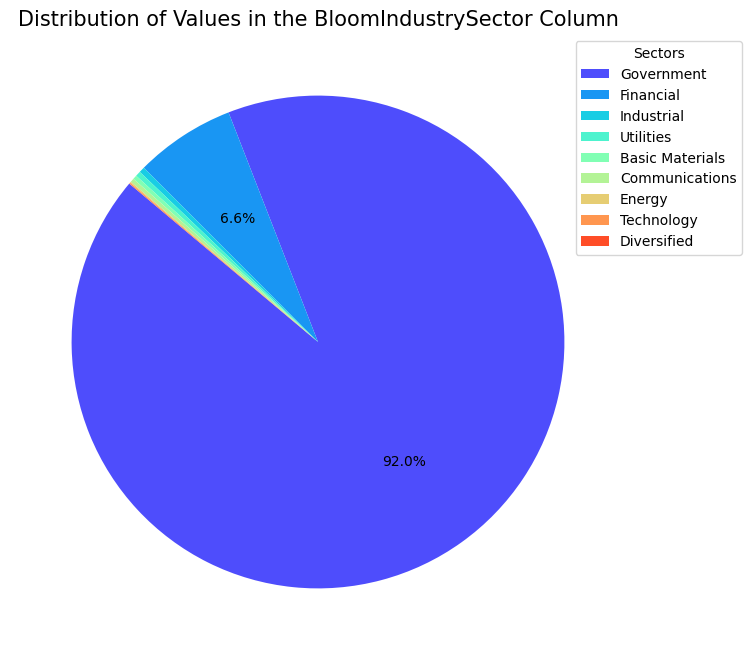

In [1074]:
sector_counts = df_preprocessed['BloomIndustrySector'].value_counts()
colors = sns.color_palette('rainbow', len(sector_counts))

# Set the threshold for displaying percentages
percentage_threshold = 2
def autopct_func(pct):
    return f'{pct:.1f}%' if pct >= percentage_threshold else ''

# Plot the pie chart without labels
plt.figure(figsize=(10, 8))
plt.pie(sector_counts, labels=None, autopct=autopct_func, startangle=140, colors=colors)
plt.legend(sector_counts.index, title='Sectors', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.title('Distribution of Values in the BloomIndustrySector Column', fontsize=15)
plt.show()


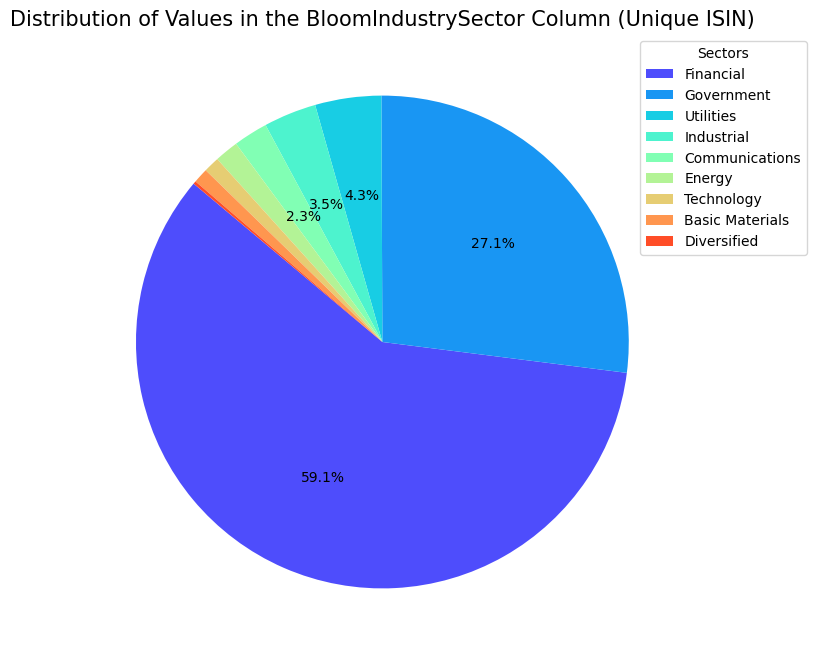

In [1075]:
# Group by unique 'ISIN' and keep the first row for each group
df_unique_isin = df_preprocessed.groupby('ISIN').first()

# Count the occurrences of each sector in the new DataFrame
sector_counts_unique_isin = df_unique_isin['BloomIndustrySector'].value_counts()

# Plot the pie chart with the new DataFrame
colors = sns.color_palette('rainbow', len(sector_counts_unique_isin))

# Set the threshold for displaying percentages
percentage_threshold = 2
def autopct_func(pct):
    return f'{pct:.1f}%' if pct >= percentage_threshold else ''

# Plot the pie chart without labels
plt.figure(figsize=(10, 8))
plt.pie(sector_counts_unique_isin, labels=None, autopct=autopct_func, startangle=140, colors=colors)
plt.legend(sector_counts_unique_isin.index, title='Sectors', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.title('Distribution of Values in the BloomIndustrySector Column (Unique ISIN)', fontsize=15)
plt.show()


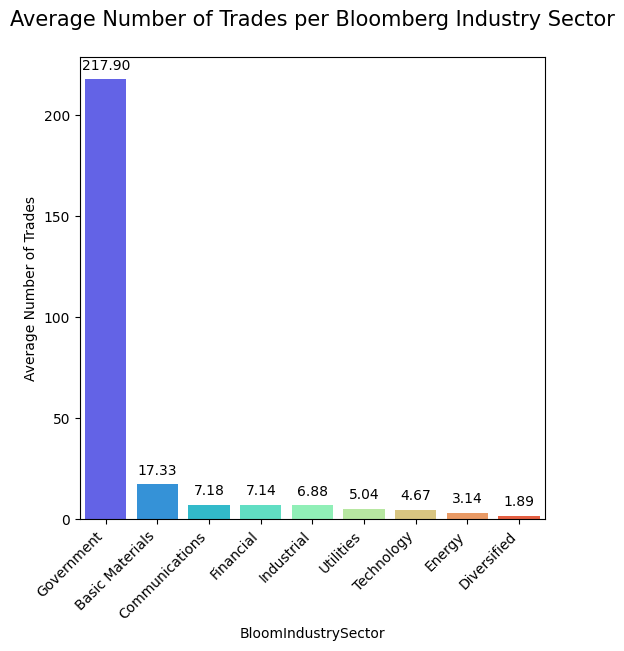

In [1076]:
df_industry = df_preprocessed[['ISIN', 'BloomIndustrySector']].copy()
df_count_trades = df_industry.groupby('ISIN').agg(Count=('BloomIndustrySector', 'count'), First_BloomIndustrySector=('BloomIndustrySector', 'first')).reset_index()
df_avg_trades_per_group = df_count_trades.groupby('First_BloomIndustrySector')['Count'].mean().reset_index()
df_avg_trades_per_group.sort_values(by='Count', ascending=False, inplace=True)

# Plot the bar chart for average number of trades per BloomIndustrySector
plt.figure(figsize=(6, 6))
ax = sns.barplot(x='First_BloomIndustrySector', y='Count', data=df_avg_trades_per_group, palette='rainbow')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Average Number of Trades per Bloomberg Industry Sector\n', fontsize=15)
plt.xlabel('BloomIndustrySector')
plt.ylabel('Average Number of Trades')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()


In [1077]:
number_industries = len(df_preprocessed['BloomIndustryGroup'].unique())
print('Number of industries : ', number_industries)
df_preprocessed.BloomIndustryGroup.value_counts()

Number of industries :  43


BloomIndustryGroup
Sovereign                   285926
Banks                        18101
Multi-National                2823
Diversified Finan Serv        1854
Electric                       920
Regional(state/provnc)         772
Iron/Steel                     662
Telecommunications             610
Transportation                 451
Insurance                      284
Engineering&Construction       197
REITS                          196
Oil&Gas                        174
Computers                      156
Savings&Loans                  146
Miscellaneous Manufactur       130
Building Materials             117
Internet                       116
Chemicals                      106
Real Estate                    103
Water                           94
Aerospace/Defense               93
Electrical Compo&Equip          90
Environmental Control           80
Municipal                       67
Mining                          64
Gas                             59
Media                           57
P

In [1078]:
number_subindustries = len(df_preprocessed['BloomIndustrySubGroup'].unique())
print('Number of sub industries : ', number_subindustries)
df_preprocessed.BloomIndustrySubGroup.value_counts()

Number of sub industries :  118


BloomIndustrySubGroup
Sovereign                   283266
Commer Banks Non-US           9320
Diversified Banking Inst      5087
Supranational Bank            2823
Sovereign Agency              2457
                             ...  
Shipbuilding                     1
Office Automation&Equip          1
Wireless Equipment               1
Insurance Brokers                1
REITS-Office Property            1
Name: count, Length: 118, dtype: int64

F. **Days_to_Maturity analysis**

In [1079]:
df_unique_isin = df_preprocessed.groupby('ISIN').first()
df_unique_isin.Days_to_Maturity.describe()

count     4918.000000
mean      1990.513217
std       2486.137348
min       -206.000000
25%        655.250000
50%       1464.500000
75%       2477.000000
max      35752.000000
Name: Days_to_Maturity, dtype: float64

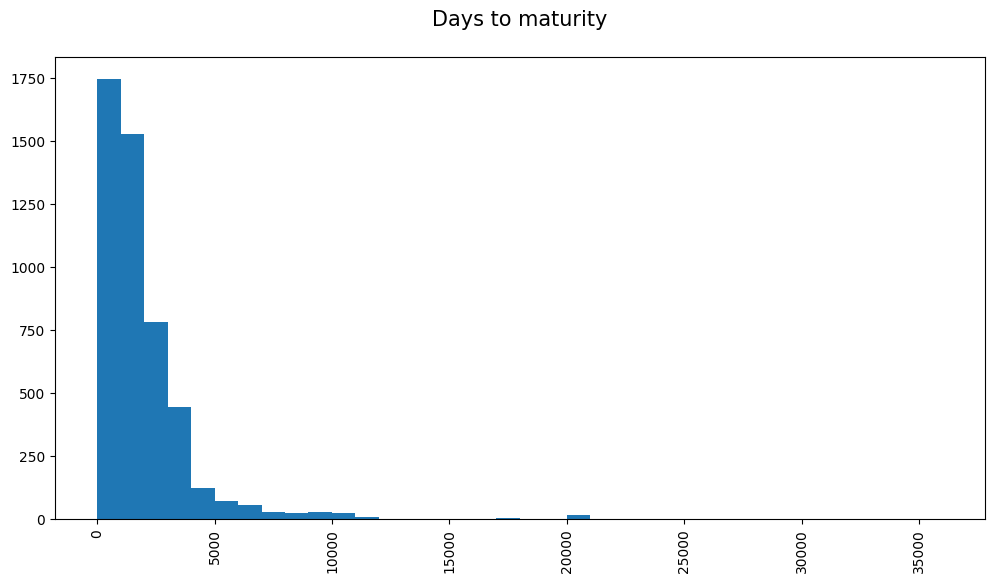

In [1080]:
# Histogram of the number of deals per company_short_name (top 20) with bins of size 50
df_unique_isin = df_preprocessed.groupby('ISIN').first()
plt.figure(figsize=(12, 6))
plt.hist(df_unique_isin['Days_to_Maturity'], bins=range(0, max(df_preprocessed['Days_to_Maturity']) + 1000, 1000))
plt.title('Days to maturity\n', fontsize=15)
plt.xticks(rotation=90)
plt.show()


G. **Fitch Credit rating**

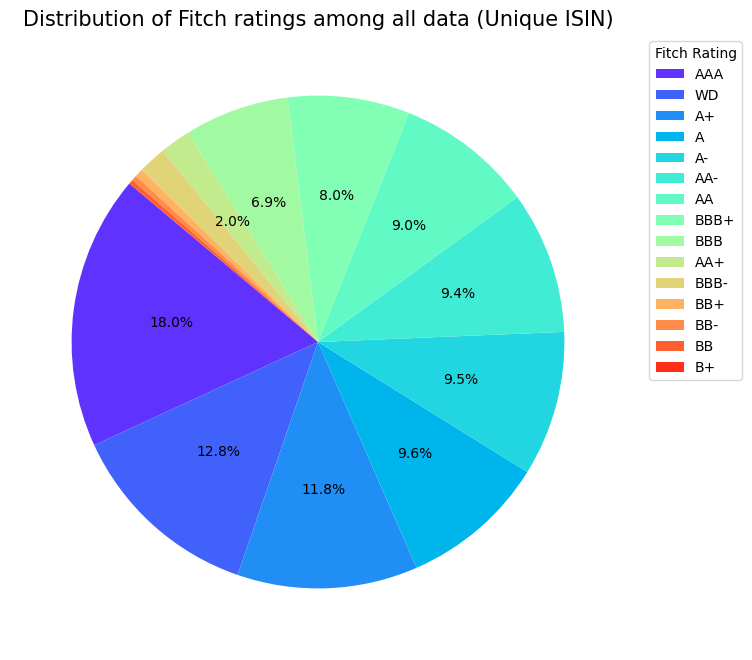

In [1081]:
# Group by unique 'ISIN' and keep the first row for each group
df_unique_isin = df_preprocessed.groupby('ISIN').first()

# Count the occurrences of each sector in the new DataFrame
sector_counts_unique_isin = df_unique_isin['Rating_Fitch'].value_counts()

# Plot the pie chart with the new DataFrame
colors = sns.color_palette('rainbow', len(sector_counts_unique_isin))

# Set the threshold for displaying percentages
percentage_threshold = 2
def autopct_func(pct):
    return f'{pct:.1f}%' if pct >= percentage_threshold else ''

# Plot the pie chart without labels
plt.figure(figsize=(10, 8))
plt.pie(sector_counts_unique_isin, labels=None, autopct=autopct_func, startangle=140, colors=colors)
plt.legend(sector_counts_unique_isin.index, title='Fitch Rating', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.title('Distribution of Fitch ratings among all data (Unique ISIN)', fontsize=15)
plt.show()


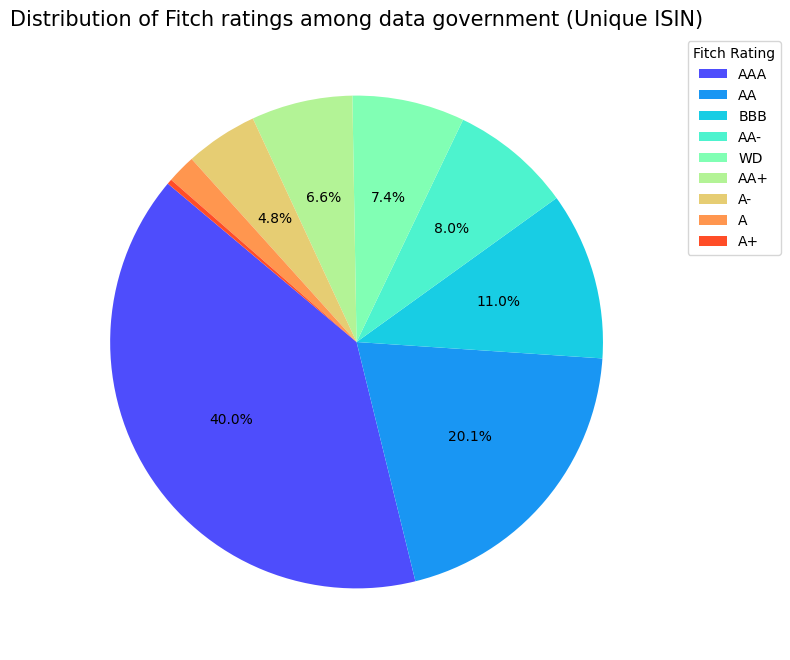

In [1082]:
# Group by unique 'ISIN' and keep the first row for each group
df_unique_isin = df_preprocessed.groupby('ISIN').first()

df_government = df_unique_isin[df_unique_isin['BloomIndustrySector']=='Government'].copy()

# Count the occurrences of each sector in the new DataFrame
sector_counts_unique_isin = df_government['Rating_Fitch'].value_counts()

# Plot the pie chart with the new DataFrame
colors = sns.color_palette('rainbow', len(sector_counts_unique_isin))

# Set the threshold for displaying percentages
percentage_threshold = 2
def autopct_func(pct):
    return f'{pct:.1f}%' if pct >= percentage_threshold else ''

# Plot the pie chart without labels
plt.figure(figsize=(10, 8))
plt.pie(sector_counts_unique_isin, labels=None, autopct=autopct_func, startangle=140, colors=colors)
plt.legend(sector_counts_unique_isin.index, title='Fitch Rating', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.title('Distribution of Fitch ratings among data government (Unique ISIN)', fontsize=15)
plt.show()


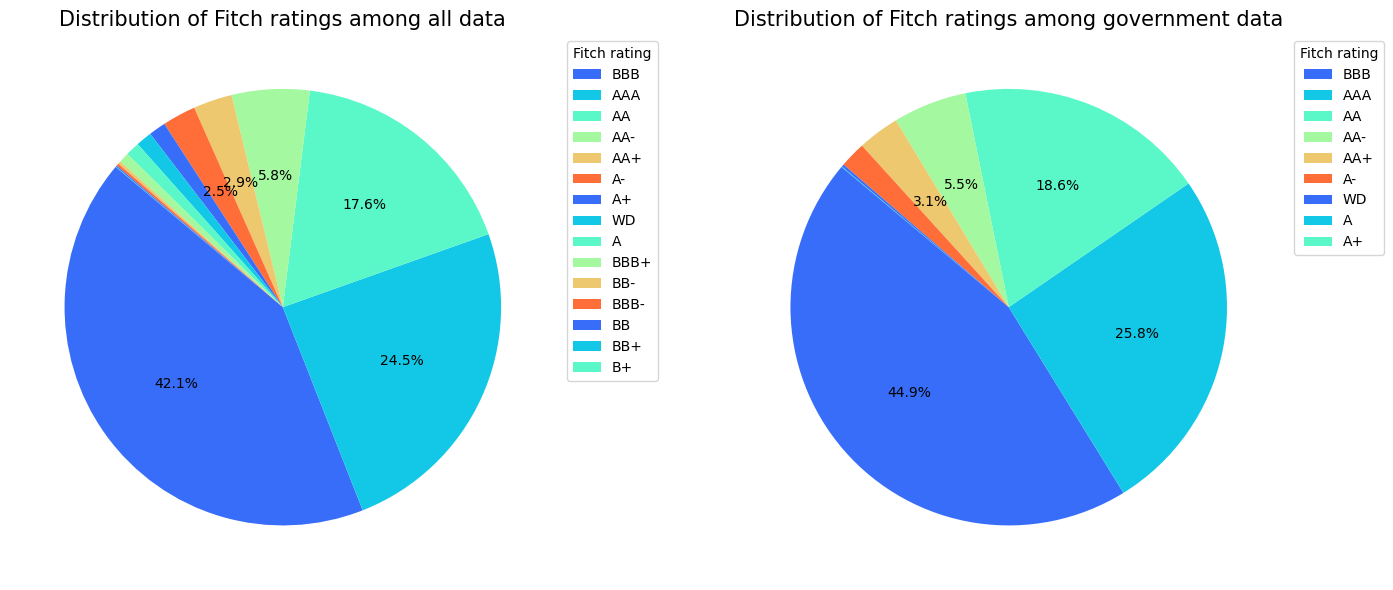

In [1083]:
# Set the common attributes
colors = sns.color_palette('rainbow')
percentage_threshold = 2
autopct_func = lambda pct: f'{pct:.1f}%' if pct >= percentage_threshold else ''

# Plot the pie chart for the entire dataset
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
Fitch_counts_all = df_preprocessed['Rating_Fitch'].value_counts()
plt.pie(Fitch_counts_all, labels=None, autopct=autopct_func, startangle=140, colors=colors)
plt.legend(Fitch_counts_all.index, title='Fitch rating', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.title('Distribution of Fitch ratings among all data', fontsize=15)

# Plot the pie chart for the government data
plt.subplot(1, 2, 2)
df_government = df_preprocessed[df_preprocessed['BloomIndustrySector']=='Government'].copy()
Fitch_counts_government = df_government['Rating_Fitch'].value_counts()
plt.pie(Fitch_counts_government, labels=None, autopct=autopct_func, startangle=140, colors=colors)
plt.legend(Fitch_counts_government.index, title='Fitch rating', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.title('Distribution of Fitch ratings among government data', fontsize=15)

# Adjust layout
plt.tight_layout()
plt.show()


In [1084]:
2.9+5.8+17.6+24.5

50.8

H. **Moodys Credit rating**

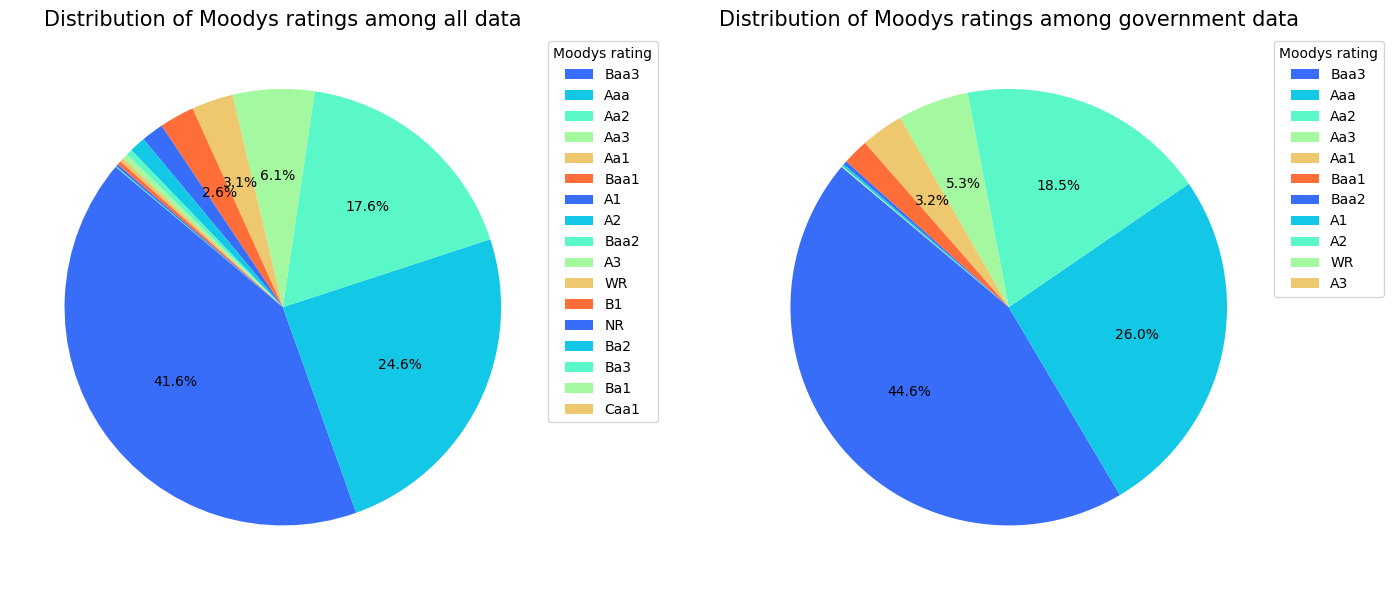

In [1085]:
# Set the common attributes
colors = sns.color_palette('rainbow')
percentage_threshold = 2
autopct_func = lambda pct: f'{pct:.1f}%' if pct >= percentage_threshold else ''

# Plot the pie chart for the entire dataset
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
moodys_counts_all = df_preprocessed['Rating_Moodys'].value_counts()
plt.pie(moodys_counts_all, labels=None, autopct=autopct_func, startangle=140, colors=colors)
plt.legend(moodys_counts_all.index, title='Moodys rating', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.title('Distribution of Moodys ratings among all data', fontsize=15)

# Plot the pie chart for the government data
plt.subplot(1, 2, 2)
df_government = df_preprocessed[df_preprocessed['BloomIndustrySector']=='Government'].copy()
moodys_counts_all = df_government['Rating_Moodys'].value_counts()
plt.pie(moodys_counts_all, labels=None, autopct=autopct_func, startangle=140, colors=colors)
plt.legend(moodys_counts_all.index, title='Moodys rating', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.title('Distribution of Moodys ratings among government data', fontsize=15)

# Adjust layout
plt.tight_layout()
plt.show()


I. **SP Credit rating**

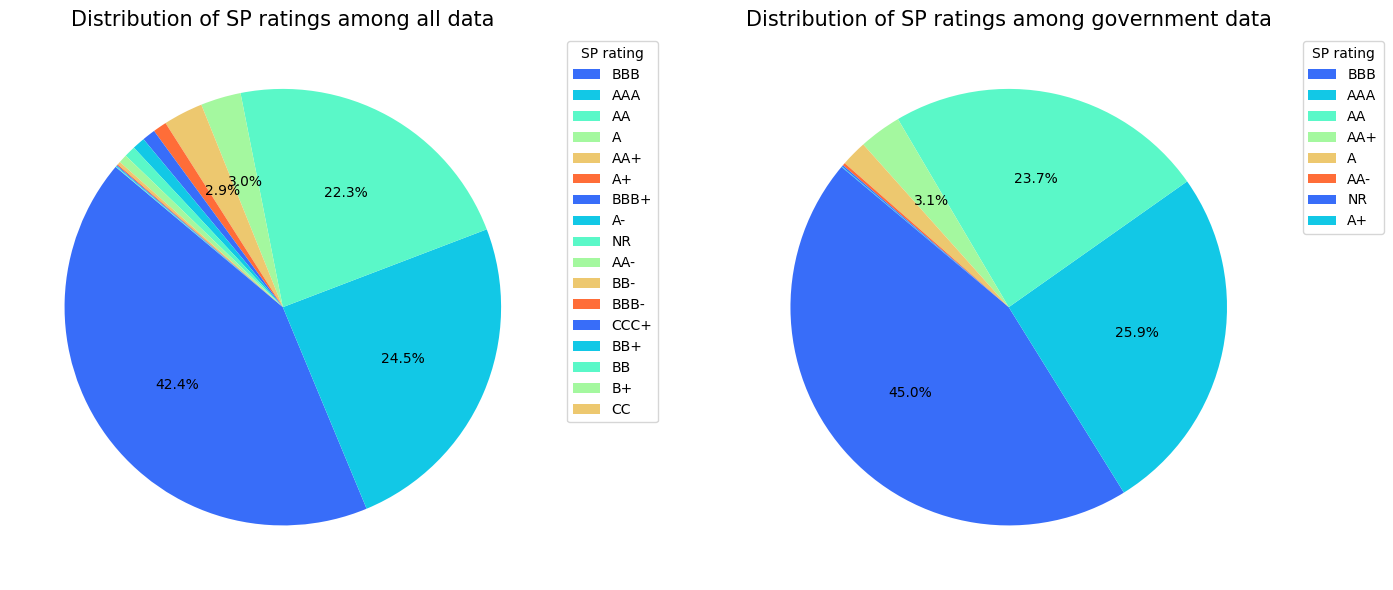

In [1086]:
# Set the common attributes
colors = sns.color_palette('rainbow')
percentage_threshold = 2
autopct_func = lambda pct: f'{pct:.1f}%' if pct >= percentage_threshold else ''

# Plot the pie chart for the entire dataset
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
moodys_counts_all = df_preprocessed['Rating_SP'].value_counts()
plt.pie(moodys_counts_all, labels=None, autopct=autopct_func, startangle=140, colors=colors)
plt.legend(moodys_counts_all.index, title='SP rating', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.title('Distribution of SP ratings among all data', fontsize=15)

# Plot the pie chart for the government data
plt.subplot(1, 2, 2)
df_government = df_preprocessed[df_preprocessed['BloomIndustrySector']=='Government'].copy()
moodys_counts_all = df_government['Rating_SP'].value_counts()
plt.pie(moodys_counts_all, labels=None, autopct=autopct_func, startangle=140, colors=colors)
plt.legend(moodys_counts_all.index, title='SP rating', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.title('Distribution of SP ratings among government data', fontsize=15)

# Adjust layout
plt.tight_layout()
plt.show()


J. **Currency analysis**

In [1087]:
# Count the occurrences of each currency
ccy_counts = df_preprocessed['Ccy'].value_counts()
print(ccy_counts)

Ccy
EUR    313093
USD      1624
GBP         1
Name: count, dtype: int64


In [1088]:
# Count the occurrences of each currency
ccy_counts = df_preprocessed['Ccy'].value_counts()
ccy_percentage = ccy_counts / len(df_preprocessed) * 100
print(ccy_percentage)

Ccy
EUR    99.483665
USD     0.516018
GBP     0.000318
Name: count, dtype: float64


The great majority of bonds (99.5%) are in euros.

K. **Bond Price analysis (B_price)**

In [1089]:
# Group by unique 'ISIN' and keep the first row for each group
df_unique_isin = df_preprocessed.groupby('ISIN').first()

df_EUR = df_unique_isin[df_unique_isin['Ccy']=='EUR']
df_EUR['B_Price'].describe()

count    4431.000000
mean       92.038140
std         9.564071
min        33.000000
25%        87.000000
50%        95.000000
75%        99.000000
max       137.000000
Name: B_Price, dtype: float64

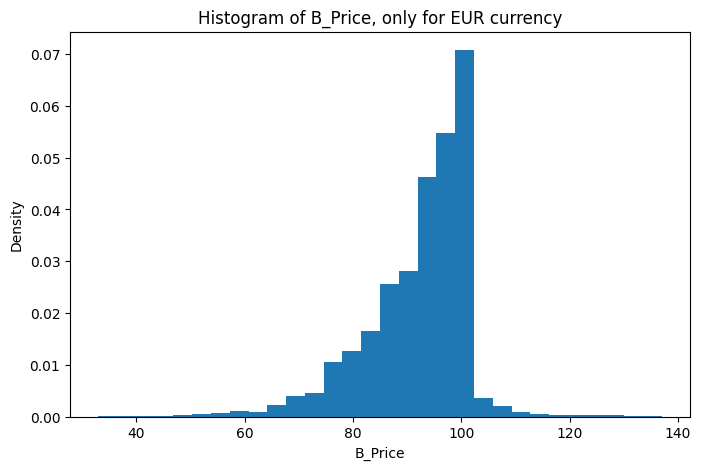

In [1090]:
plt.figure(figsize=(8, 5))
df_EUR['B_Price'].hist(bins=30, grid=False, density=True)
plt.title('Histogram of B_Price, only for EUR currency')
plt.xlabel('B_Price')
plt.ylabel('Density')
plt.show()


L. **Country analysis**

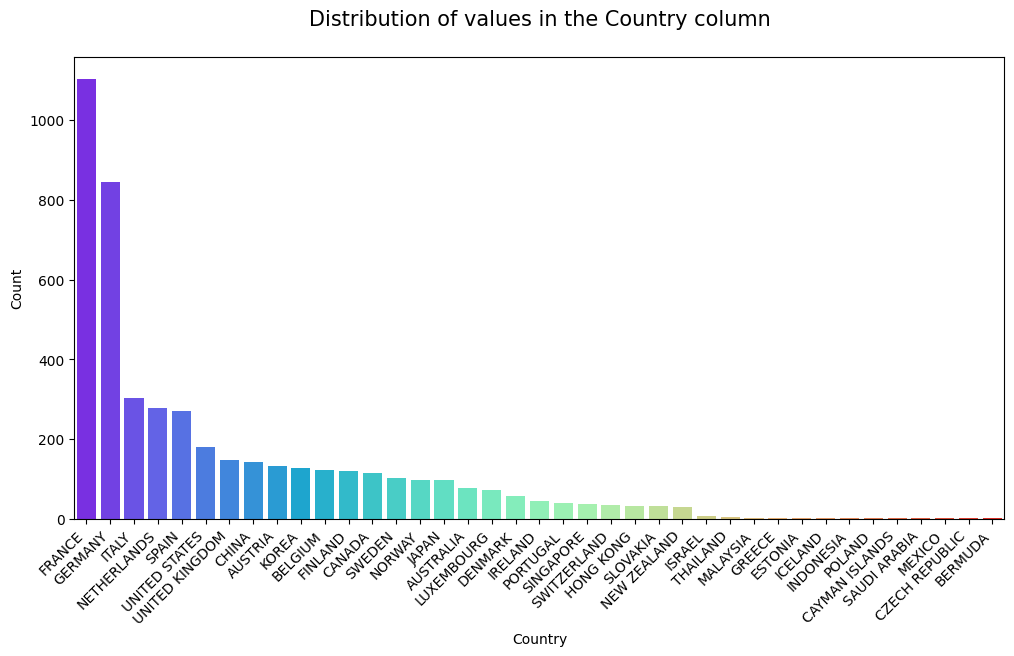

In [1091]:
df_unique_isin = df_preprocessed.groupby('ISIN').first()
country_counts = df_unique_isin['Country'].value_counts()

# Plot the bar chart for country columns
plt.figure(figsize=(12, 6))
sns.barplot(x=country_counts.index, y=country_counts, palette='rainbow')
plt.title('Distribution of values in the Country column\n', fontsize = 15)
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()


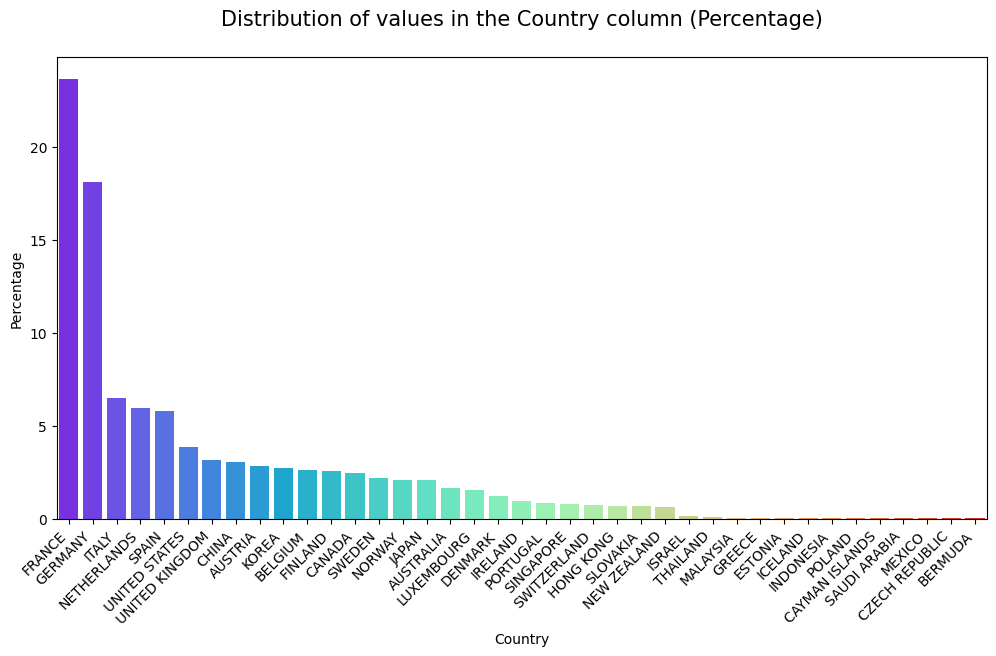

In [1092]:
# Calculate the percentage distribution
country_percentage = (country_counts / country_counts.sum()) * 100

# Plot the bar chart for country columns with percentages
plt.figure(figsize=(12, 6))
sns.barplot(x=country_percentage.index, y=country_percentage, palette='rainbow')
plt.title('Distribution of values in the Country column (Percentage)\n', fontsize = 15)
plt.xlabel('Country')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()


In [1093]:
country_percentage.head(5)

Country
FRANCE         23.670669
GERMANY        18.117496
ITALY           6.518010
NETHERLANDS     5.960549
SPAIN           5.789022
Name: count, dtype: float64

The majority are Italian, French and German bonds.

M. **Coupon analysis**

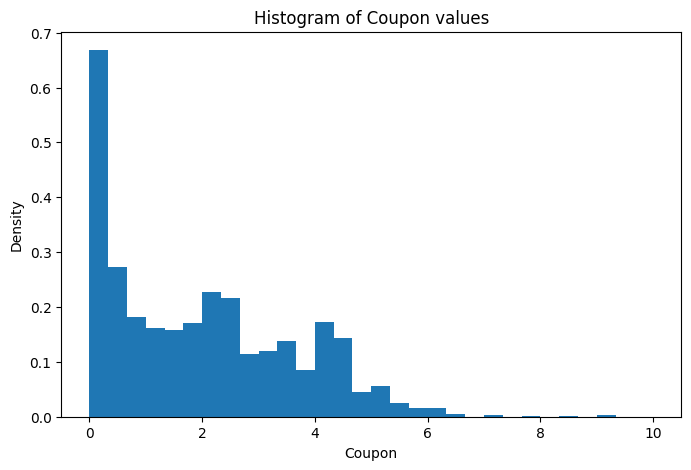

In [1094]:
plt.figure(figsize=(8, 5))
df_preprocessed['Coupon'].hist(bins=30, grid=False, density=True)
plt.title('Histogram of Coupon values')
plt.xlabel('Coupon')
plt.ylabel('Density')
plt.show()


In [1095]:
df_preprocessed.GSpreadMid.describe()

count    82800.000000
mean       103.841259
std         76.327224
min       -325.936432
25%         52.516930
50%         85.621807
75%        162.431858
max       4707.474609
Name: GSpreadMid, dtype: float64

## Exploring the heterogeneity of clients and bonds

- **Exploring the heterogeneity of clients** (p.13 of the thesis): most active client ? What is he accounting for among all performed RFQs ? Find something like '80% of the accounted RFQs were made by less than 10% of the client pool'. Plot the graph Cumulative propoertion of clients as a function of cumulative proportion of RFQs.


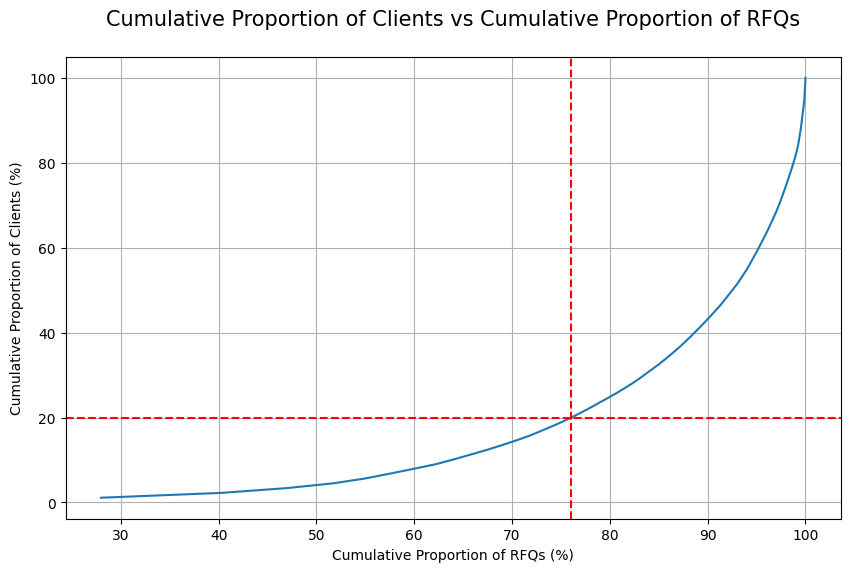

In [1096]:
# Generate the dataframe
df_clients = df_preprocessed[['ISIN', 'company_short_name']]
df_RFQ_count = df_clients.groupby(by='company_short_name').agg(count=('company_short_name','count')).reset_index()
df_RFQ_count.columns = ['company_short_name', 'RFQ_count']
total_RFQ_transactions = df_RFQ_count.RFQ_count.sum()
df_RFQ_count['RFQ_count_perc'] = df_RFQ_count['RFQ_count']*100/total_RFQ_transactions

df_RFQ_count.sort_values(by='RFQ_count', ascending=False, inplace=True)
df_RFQ_count['client_number'] = 1
df_RFQ_count['cum_sum_client'] = np.round(df_RFQ_count['client_number'].cumsum() * 100 /(df_RFQ_count.shape[0]), 2)
df_RFQ_count.drop(columns=['client_number'], inplace=True)
df_RFQ_count['cum_sum_RFQ'] = np.round(df_RFQ_count['RFQ_count_perc'].cumsum(), 2)

# Generate the plot
plt.figure(figsize=(10, 6))
plt.plot(df_RFQ_count['cum_sum_RFQ'], df_RFQ_count['cum_sum_client'], linestyle='-')
plt.title('Cumulative Proportion of Clients vs Cumulative Proportion of RFQs\n', fontsize=15)
plt.xlabel('Cumulative Proportion of RFQs (%)')
plt.ylabel('Cumulative Proportion of Clients (%)')
plt.axvline(x=76, color='red', linestyle='--') 
plt.axhline(y=20, color='red', linestyle='--') 
plt.grid(True)
plt.show()

In [1097]:
df_RFQ_count.head()

,company_short_name,RFQ_count,RFQ_count_perc,cum_sum_client,cum_sum_RFQ
86,societe generale mer,87953,27.946606,1.12,27.95
38,cegi ett,38541,12.246201,2.25,40.19
48,credit agricole centre loire entreprises,21085,6.699649,3.37,46.89
65,hsbc,14932,4.744565,4.49,51.64
16,bnp reunion,10283,3.267370,5.62,54.90


In [1098]:
df_RFQ_count[df_RFQ_count['cum_sum_client']>20].head()

,company_short_name,RFQ_count,RFQ_count_perc,cum_sum_client,cum_sum_RFQ
88,somupaca,3154,1.002167,20.22,76.25
5,atradius,3045,0.967533,21.35,77.21
74,oseo,2899,0.921142,22.47,78.13
36,cegc,2763,0.877929,23.60,79.01
67,maitre bondroit,2756,0.875705,24.72,79.89


Observations regarding the heterogeneity of clients : 
- The **most active client** (societe generale mer) accounted for 27.95% of all performed RFQs alone 
- **76% of the accounted RFQs** were made by less of **20% of the client pool**


**Exploring the heterogeneity of bonds**  (p.13 of the thesis): % of bonds that are shared among several clients ? Find somthing like '80% of the RFQs were done on more than 30% of the considered assets.' Plot the cumulative number of assets as a function of the cumulative proportion of RFQs.

In [1099]:
df_bonds = df_preprocessed[['ISIN', 'cdcissuer']].copy()
df_bonds = df_bonds.groupby(by='ISIN').agg('count').reset_index()
df_bonds.columns= ['ISIN', 'count']
df_bonds.sort_values(by='count', ascending=False, inplace=True)
total_bond = df_preprocessed.shape[0]
df_bonds['count_perc'] = np.round(df_bonds['count']*100/total_bond, 2)
df_bonds.head()

,ISIN,count,count_perc
2228,IT0003934657,8333,2.65
2346,IT0005441883,4212,1.34
2336,IT0005425233,4190,1.33
1806,FR0014001NN8,4033,1.28
2372,IT0005518128,3980,1.26


In [1100]:
df_bonds = df_preprocessed[['ISIN', 'cdcissuer']].copy()
df_bonds = df_bonds.groupby(by='cdcissuer').agg('count').reset_index()
df_bonds.columns = ['cdcissuer', 'count']
df_bonds.sort_values(by='count', ascending=False, inplace=True)
total_bond = df_preprocessed.shape[0]
df_bonds['count_perc'] = np.round(df_bonds['count']*100/total_bond, 2)
df_bonds.head()

,cdcissuer,count,count_perc
123,BTP,129018,40.99
291,FRENCH REPUBLIC GOVERNMENT BOND OAT,51777,16.45
125,BUNDESREPUBLIK DEUTSCHLAND BUNDESANLEIHE,33257,10.57
378,KINGDOM OF BELGIUM GOVERNMENT BOND,15105,4.80
474,NETHERLANDS GOVERNMENT BOND,14467,4.60


First line where the cumulated sum of RFQs is higher than 80% :
ISIN                 BE0000333428
count_perc                   0.11
count_perc_cumsum           80.01
cum_sum_asset                5.23
Name: 88, dtype: object


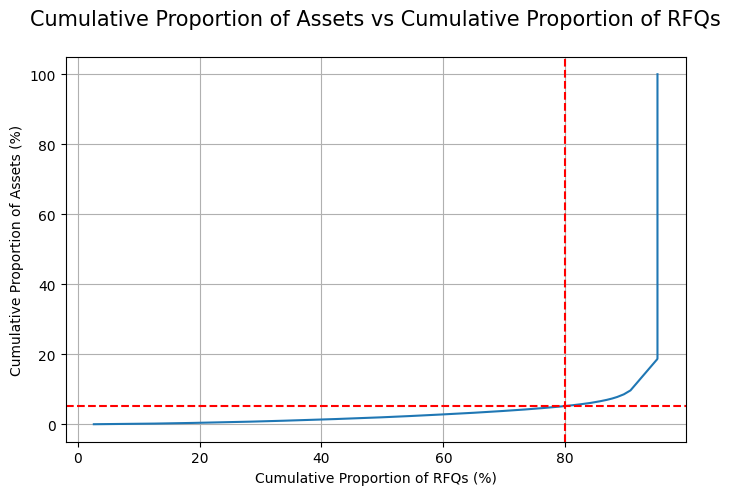

In [1101]:
df_bonds = df_preprocessed[['ISIN', 'cdcissuer']].copy()
df_bonds = df_bonds.groupby(by='ISIN').agg('count').reset_index()
df_bonds.columns= ['ISIN', 'count']
df_bonds.sort_values(by='count', ascending=False, inplace=True)
total_bond = df_preprocessed.shape[0]
df_bonds['count_perc'] = np.round(df_bonds['count']*100/total_bond, 2)
df_bonds['count_perc_cumsum'] = df_bonds['count_perc'].cumsum()

df_bonds['number_asset'] = 1
total_asset = df_bonds.shape[0]
df_bonds['cum_sum_asset'] = np.round(df_bonds['number_asset'].cumsum()*100/total_asset, 2)
df_bonds.drop(columns=['number_asset', 'count'], inplace=True)

print('First line where the cumulated sum of RFQs is higher than 80% :')
df_higher_20 = df_bonds[df_bonds['count_perc_cumsum']>80]
print(df_higher_20.iloc[0])

# Plot the histogram 
plt.figure(figsize=(8, 5))
plt.plot(df_bonds['count_perc_cumsum'], df_bonds['cum_sum_asset'], linestyle='-')
plt.title('Cumulative Proportion of Assets vs Cumulative Proportion of RFQs\n', fontsize=15)
plt.xlabel('Cumulative Proportion of RFQs (%)')
plt.ylabel('Cumulative Proportion of Assets (%)')
plt.axvline(x=80.01, color='red', linestyle='--') 
plt.axhline(y=5.23, color='red', linestyle='--') 
plt.grid(True)
plt.show()

Observations regarding the heterogeneity of bonds :
- The **most active bond** (ISIN : IT0003934657) accounted for 2.65% of the all RFQs
- The **most active bond issuer** (cdcissuer : BTP) accounted for 50% of all RFQs
- **80% of the RFQs** were done on a bit more than **5% of the considered assets**. The heterogeity of bonds is then well more pronounced that the heterogeity of clients.

**Conclusion :** Most clients only trade a handful of bonds, and most bonds are only traded by a handful of clients. This problemn is referred in the page 13/14 of the thesis as the **long tail problem** :

"It can consequently become diffcult to build recommender systems able to propose the entire asset pool to a given client, and reciprocally. This phenomenon is referred to in the literature as the long tail problem (Park and Tuzhilin, 2008), which refers to the fact that for most items, very few activity is recorded. Park and Tuzhilin (2008) proposes a way to tackle this by splitting the item pool in a head and tail parts and train models on each of these parts, the tail model being trained on clustered items. More broadly, the long tail is tackled by systems that favor diverse recommendations, i.e., recommendations that are made outside of the usual clients’ patterns."

## Writing EDA functions

### 1. Bond Analysis functions (given ISIN code)

On peut afficher : 
- L'évolution du prix du bond selon la deal_date
- L'évolution du days to maturity selon la deal_date
- Le nombre de transactions
- Répartition buyer and seller 
- Un diagramme montrant les clients qui achètent déjà ce bond 


In [1102]:
ISIN_ex1 = 'AT0000383864'
ISIN_ex2 = 'AT0000A04967'
ISIN_ex3 = 'AT0000A0DXC2'
ISIN_ex4 = 'AT0000A0U299'

A. General Info display

In [1103]:
def plot_double_general_info(df, ISIN1, ISIN2):
    # Filter DataFrame for ISIN1
    df_ISIN1 = df[df['ISIN'] == ISIN1].copy()
    df_ISIN1.sort_values(by='Deal_Date', inplace=True)
    
    # Filter DataFrame for ISIN2
    df_ISIN2 = df[df['ISIN'] == ISIN2].copy()
    df_ISIN2.sort_values(by='Deal_Date', inplace=True)

    # Check if the DataFrames are empty after filtering
    if df_ISIN1.empty or df_ISIN2.empty:
        return "No data found for the given ISINs."
    
    # Create a PrettyTable
    table = PrettyTable()
    table.field_names = ["ISIN code", "Country", "Issuer", 
                         "Sector", "Industry", "SubIndustry"
                         ]

    # Format the maturity date for ISIN1
    maturity_date1 = df_ISIN1.maturity.iloc[0].strftime("%Y-%m-%d %H:%M:%S")
    maturity_date1 = maturity_date1[:-9]  
    
    # Add data for ISIN1 to the PrettyTable
    table.add_row([df_ISIN1.ISIN.iloc[0],
                   df_ISIN1.Country.iloc[0],
                   df_ISIN1.cdcissuer.iloc[0],                
                   df_ISIN1.BloomIndustrySector.iloc[0],
                   df_ISIN1.BloomIndustryGroup.iloc[0],
                   df_ISIN1.BloomIndustrySubGroup.iloc[0],

    ])

    # Format the maturity date for ISIN2
    maturity_date2 = df_ISIN2.maturity.iloc[0].strftime("%Y-%m-%d %H:%M:%S")
    maturity_date2 = maturity_date2[:-9]  

    # Add data for ISIN2 to the PrettyTable
    table.add_row([df_ISIN2.ISIN.iloc[0],
                   df_ISIN2.Country.iloc[0],
                   df_ISIN2.cdcissuer.iloc[0],                
                   df_ISIN2.BloomIndustrySector.iloc[0],
                   df_ISIN1.BloomIndustryGroup.iloc[0],
                   df_ISIN1.BloomIndustrySubGroup.iloc[0],

    ])

    # Print the PrettyTable
    print(table)

# Example usage:
plot_double_general_info(df_preprocessed, ISIN_ex1, ISIN_ex2)


+--------------+---------+-------------------------------------+------------+-----------+-------------+
|  ISIN code   | Country |                Issuer               |   Sector   |  Industry | SubIndustry |
+--------------+---------+-------------------------------------+------------+-----------+-------------+
| AT0000383864 | AUSTRIA | REPUBLIC OF AUSTRIA GOVERNMENT BOND | Government | Sovereign |  Sovereign  |
| AT0000A04967 | AUSTRIA | REPUBLIC OF AUSTRIA GOVERNMENT BOND | Government | Sovereign |  Sovereign  |
+--------------+---------+-------------------------------------+------------+-----------+-------------+


In [1141]:
def plot_financial_info(df, ISIN1, ISIN2):
    # Filter DataFrame for ISIN1
    df_ISIN1 = df[df['ISIN'] == ISIN1].copy()
    df_ISIN1.sort_values(by='Deal_Date', inplace=True)
    
    # Filter DataFrame for ISIN2
    df_ISIN2 = df[df['ISIN'] == ISIN2].copy()
    df_ISIN2.sort_values(by='Deal_Date', inplace=True)

    # Check if the DataFrames are empty after filtering
    if df_ISIN1.empty or df_ISIN2.empty:
        return "No data found for the given ISINs."
    
    # Create a PrettyTable
    table = PrettyTable()
    table.field_names = ["ISIN code", "Mean Price", "Maturity", "Coupon", 
                         "Frequency", "Type"]

    # Format the maturity date for ISIN1
    maturity_date1 = df_ISIN1.maturity.iloc[0].strftime("%Y-%m-%d %H:%M:%S")
    maturity_date1 = maturity_date1[:-9]  
    currency1 = df_ISIN1.Ccy.iloc[0]
    
    # Add data for ISIN1 to the PrettyTable
    table.add_row([str(df_ISIN1.ISIN.iloc[0]) + ' (Initial)',
                   str(np.round(df_ISIN1.B_Price.mean(), 2)) + f' ({currency1})',
                   maturity_date1,
                   np.round(df_ISIN1.Coupon.iloc[0], 2),
                   df_ISIN1.Frequency.iloc[0],
                   df_ISIN1.Type.iloc[0],                   
    ])

    # Format the maturity date for ISIN2
    maturity_date2 = df_ISIN2.maturity.iloc[0].strftime("%Y-%m-%d %H:%M:%S")
    maturity_date2 = maturity_date2[:-9]  
    currency2 = df_ISIN2.Ccy.iloc[0]

    # Add data for ISIN2 to the PrettyTable
    table.add_row([str(df_ISIN2.ISIN.iloc[0]) + ' (Recommended)',
                   str(np.round(df_ISIN2.B_Price.mean(), 2)) + f' ({currency2})',
                   maturity_date2,
                   np.round(df_ISIN2.Coupon.iloc[0], 2),
                   df_ISIN2.Frequency.iloc[0],
                   df_ISIN2.Type.iloc[0],                       
    ])

    # Print the PrettyTable
    print(table)

# Example usage:
plot_financial_info(df_preprocessed, ISIN_ex1, ISIN_ex2)

+----------------------------+--------------+------------+--------+-----------+-------+
|         ISIN code          |  Mean Price  |  Maturity  | Coupon | Frequency |  Type |
+----------------------------+--------------+------------+--------+-----------+-------+
|   AT0000383864 (Initial)   | 112.82 (EUR) | 2027-07-15 |  6.25  |     12    | Fixed |
| AT0000A04967 (Recommended) | 111.63 (EUR) | 2037-03-15 |  4.15  |     12    | Fixed |
+----------------------------+--------------+------------+--------+-----------+-------+


B. **Bond Price evolution** as a function of the deal date

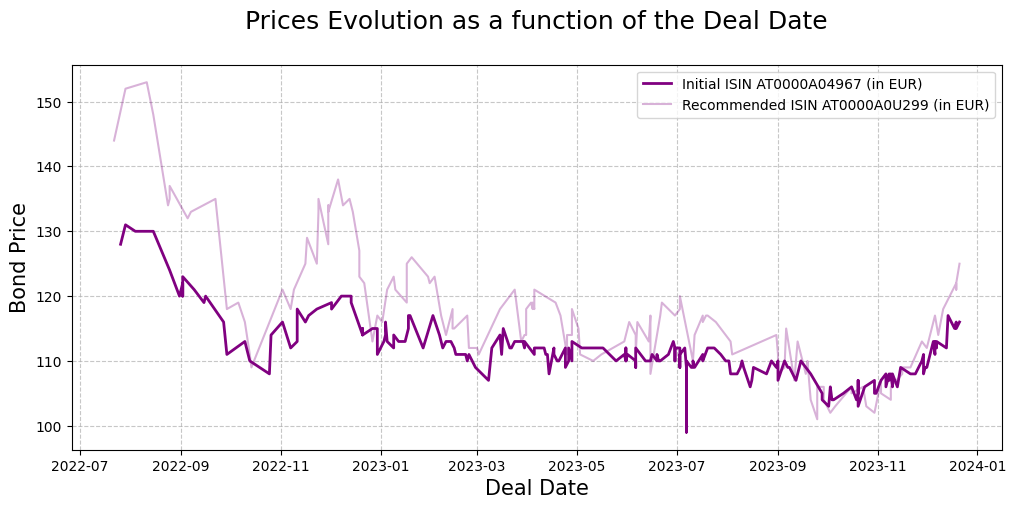

In [1139]:
def plot_double_price_evolution(df, ISIN1, ISIN2):
    """
    Plots the price evolution of a bond over its deal dates.

    Parameters:
    - df (DataFrame): The DataFrame containing bond data.
    - ISIN (str): The International Securities Identification Number of the bond.

    Returns:
    None
    """
    # Process the dataframe
    df_ISIN1 = df[df['ISIN'] == ISIN1].copy()
    df_ISIN1.sort_values(by='Deal_Date', inplace=True)

    df_ISIN2 = df[df['ISIN'] == ISIN2].copy()
    df_ISIN2.sort_values(by='Deal_Date', inplace=True)

    # Plot the figure with violet color scheme
    plt.figure(figsize=(12, 5))
    df_ISIN1_currency = df_ISIN1.iloc[0].Ccy
    df_ISIN2_currency = df_ISIN2.iloc[0].Ccy
    plt.plot(df_ISIN1['Deal_Date'], df_ISIN1['B_Price'], color='purple', linestyle='-', linewidth=2, label=f'Initial ISIN {ISIN1} (in {df_ISIN1_currency})')
    plt.plot(df_ISIN2['Deal_Date'], df_ISIN2['B_Price'], color='purple', alpha=0.3, linestyle='-', markersize=4, label=f'Recommended ISIN {ISIN2} (in {df_ISIN2_currency})')
    plt.xlabel('Deal Date', fontsize=15)
    plt.ylabel(f'Bond Price', fontsize=15)
    plt.title(f'Prices Evolution as a function of the Deal Date\n', fontsize=18)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7) 
    plt.show()

# Example usage:
ISIN_ex1 = 'AT0000383864'
plot_double_price_evolution(df_preprocessed, ISIN_ex2, ISIN_ex4)

C. Display of the grades comparision

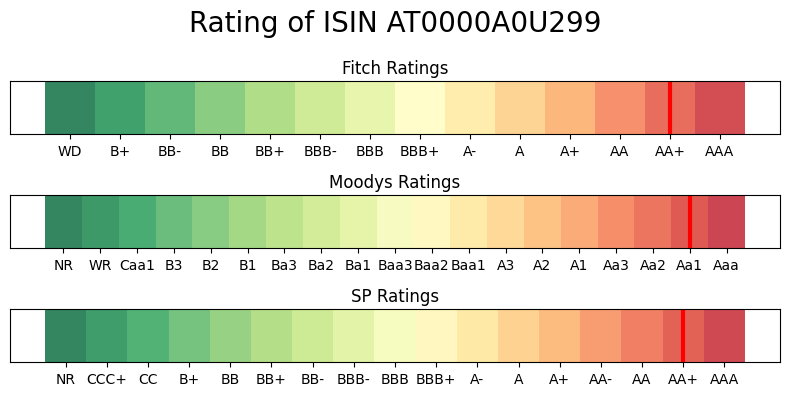

In [1156]:
def plot_triple_vertical_gauges(df, ISIN):
    # Dataframe for the specified ISIN
    df_ISIN = df[df['ISIN'] == ISIN]

    sorted_fitch_ratings = ['WD', 'B+', 'BB-', 'BB', 'BB+', 'BBB-', 'BBB', 'BBB+', 'A-', 'A', 'A+', 'AA', 'AA+', 'AAA']
    sorted_moodys_ratings = ['NR', 'WR', 'Caa1', 'B3', 'B2', 'B1', 'Ba3', 'Ba2', 'Ba1', 'Baa3', 'Baa2', 'Baa1', 'A3', 'A2', 'A1', 'Aa3', 'Aa2', 'Aa1', 'Aaa']
    sorted_sp_ratings = ['NR', 'CCC+', 'CC', 'B+', 'BB', 'BB+', 'BB-', 'BBB-', 'BBB', 'BBB+', 'A-', 'A', 'A+', 'AA-', 'AA', 'AA+', 'AAA']

    # Create a figure and axes
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 4))

    # Plot for Fitch
    cmap_fitch = plt.get_cmap('RdYlGn_r')
    colors_fitch = [cmap_fitch(i / len(sorted_fitch_ratings)) for i in range(len(sorted_fitch_ratings))]
    grade_fitch = df_ISIN['Rating_Fitch'].iloc[0]

    for i, rating in enumerate(sorted_fitch_ratings):
        ax1.axvspan(i, i + 1, facecolor=colors_fitch[i], alpha=0.8)

    if grade_fitch and grade_fitch in sorted_fitch_ratings:
        grade_index_fitch = sorted_fitch_ratings.index(grade_fitch)
        ax1.axvline(x=grade_index_fitch + 0.5, color='red', linestyle='-', linewidth=3)

    ax1.set_xticks(np.arange(len(sorted_fitch_ratings)) + 0.5)
    ax1.set_xticklabels(sorted_fitch_ratings)
    ax1.set_yticks([])
    ax1.set_aspect('auto')
    ax1.set_title(f'Fitch Ratings')

    # Plot for Moodys
    cmap_moodys = plt.get_cmap('RdYlGn_r')
    colors_moodys = [cmap_moodys(i / len(sorted_moodys_ratings)) for i in range(len(sorted_moodys_ratings))]
    grade_moodys = df_ISIN['Rating_Moodys'].iloc(0)

    for i, rating in enumerate(sorted_moodys_ratings):
        ax2.axvspan(i, i + 1, facecolor=colors_moodys[i], alpha=0.8)

    if grade_moodys and grade_moodys[0] in sorted_moodys_ratings:
        grade_index_moodys = sorted_moodys_ratings.index(grade_moodys[0])
        ax2.axvline(x=grade_index_moodys + 0.5, color='red', linestyle='-', linewidth=3)

    ax2.set_xticks(np.arange(len(sorted_moodys_ratings)) + 0.5)
    ax2.set_xticklabels(sorted_moodys_ratings)
    ax2.set_yticks([])
    ax2.set_aspect('auto')
    ax2.set_title(f'Moodys Ratings')

    # Plot for SP
    cmap_sp = plt.get_cmap('RdYlGn_r')
    colors_sp = [cmap_sp(i / len(sorted_sp_ratings)) for i in range(len(sorted_sp_ratings))]
    grade_sp = df_ISIN['Rating_SP'].iloc[0]

    for i, rating in enumerate(sorted_sp_ratings):
        ax3.axvspan(i, i + 1, facecolor=colors_sp[i], alpha=0.8)

    if grade_sp and grade_sp in sorted_sp_ratings:
        grade_index_sp = sorted_sp_ratings.index(grade_sp)
        ax3.axvline(x=grade_index_sp + 0.5, color='red', linestyle='-', linewidth=3)

    ax3.set_xticks(np.arange(len(sorted_sp_ratings)) + 0.5)
    ax3.set_xticklabels(sorted_sp_ratings)
    ax3.set_yticks([])
    ax3.set_aspect('auto')
    ax3.set_title(f'SP Ratings')

    plt.suptitle(f'Rating of ISIN {ISIN}', fontsize=20)

    plt.tight_layout()
    plt.show()

# Run
plot_triple_vertical_gauges(df_preprocessed, ISIN_ex4)


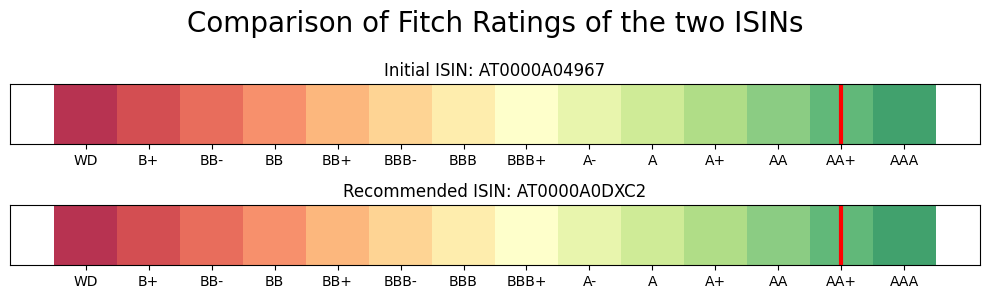

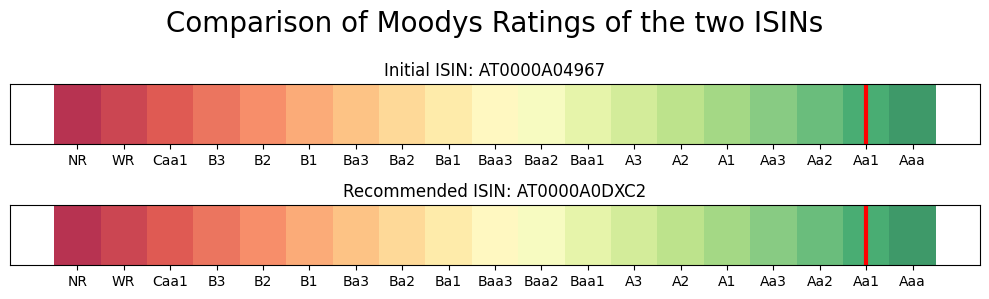

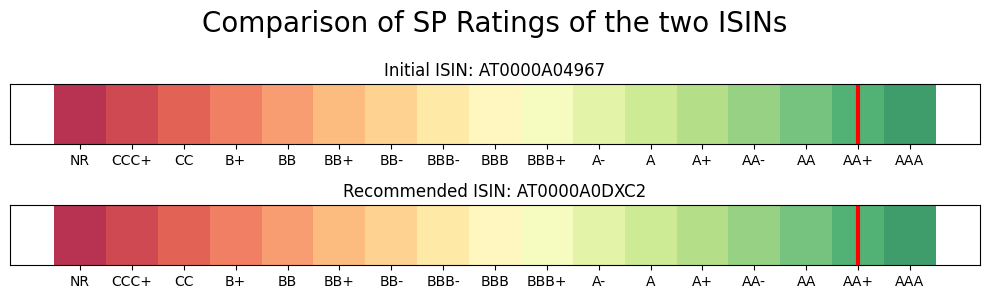

In [1144]:
def plot_double_horizontal_gauges(df, ISIN1, ISIN2, rating_name='Fitch'):
    # Dataframes for both ISINs
    df_ISIN1 = df[df['ISIN'] == ISIN1]
    df_ISIN2 = df[df['ISIN'] == ISIN2]

    if rating_name == 'Fitch':
        sorted_ratings = ['WD', 'B+', 'BB-', 'BB', 'BB+', 'BBB-', 'BBB', 'BBB+', 'A-', 'A', 'A+', 'AA', 'AA+', 'AAA']
        grade1 = df_ISIN1.Rating_Fitch.iloc[0]
        grade2 = df_ISIN2.Rating_Fitch.iloc[0]

    if rating_name == 'Moodys':
        sorted_ratings = ['NR', 'WR', 'Caa1', 'B3', 'B2', 'B1', 'Ba3', 'Ba2', 'Ba1', 'Baa3', 'Baa2', 'Baa1', 'A3', 'A2', 'A1', 'Aa3', 'Aa2', 'Aa1', 'Aaa']
        grade1 = df_ISIN1.Rating_Moodys.iloc[0]
        grade2 = df_ISIN2.Rating_Moodys.iloc[0]

    if rating_name == 'SP':
        sorted_ratings = ['NR', 'CCC+', 'CC', 'B+', 'BB', 'BB+', 'BB-', 'BBB-', 'BBB', 'BBB+', 'A-', 'A', 'A+', 'AA-', 'AA', 'AA+', 'AAA']
        grade1 = df_ISIN1.Rating_SP.iloc[0]
        grade2 = df_ISIN2.Rating_SP.iloc[0]

    # Create a figure and axes
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 3))

    # Plot for ISIN1
    cmap = plt.get_cmap('RdYlGn')  # Modified colormap for red to green gradient
    colors1 = [cmap(i / len(sorted_ratings)) for i in range(len(sorted_ratings))]
    for i, rating in enumerate(sorted_ratings):
        ax1.axvspan(i, i + 1, facecolor=colors1[i], alpha=0.8)

    if grade1 and grade1 in sorted_ratings:
        grade_index1 = sorted_ratings.index(grade1)
        ax1.axvline(x=grade_index1 + 0.5, color='red', linestyle='-', linewidth=3)

    ax1.set_xticks(np.arange(len(sorted_ratings)) + 0.5)
    ax1.set_xticklabels(sorted_ratings)
    ax1.set_yticks([])
    ax1.set_aspect('auto')
    ax1.set_title(f'Initial ISIN: {ISIN1}')

    # Plot for ISIN2
    colors2 = [cmap(i / len(sorted_ratings)) for i in range(len(sorted_ratings))]
    for i, rating in enumerate(sorted_ratings):
        ax2.axvspan(i, i + 1, facecolor=colors2[i], alpha=0.8)

    if grade2 and grade2 in sorted_ratings:
        grade_index2 = sorted_ratings.index(grade2)
        ax2.axvline(x=grade_index2 + 0.5, color='red', linestyle='-', linewidth=3)

    ax2.set_xticks(np.arange(len(sorted_ratings)) + 0.5)
    ax2.set_xticklabels(sorted_ratings)
    ax2.set_yticks([])
    ax2.set_aspect('auto')
    ax2.set_title(f'Recommended ISIN: {ISIN2}')
    plt.suptitle(f'Comparison of {rating_name} Ratings of the two ISINs', fontsize=20)
    plt.tight_layout()
    plt.show()

# Run
plot_double_horizontal_gauges(df_preprocessed, ISIN_ex2, ISIN_ex3, rating_name='Fitch')
plot_double_horizontal_gauges(df_preprocessed, ISIN_ex2, ISIN_ex3, rating_name='Moodys')
plot_double_horizontal_gauges(df_preprocessed, ISIN_ex2, ISIN_ex3, rating_name='SP')


E. Display the client type 

F. Other numerical values display as a function of the deal date

In [1142]:
def plot_double_GSpreadMid_evolution(df, ISIN1, ISIN2, column='MidYTM'):
    """
    Plots the evolution of the 'column' value of a bond over its deal dates.

    Parameters:
    - df (DataFrame): The DataFrame containing bond data.
    - ISIN (str): The International Securities Identification Number of the bond.

    Returns:
    None
    """
    # Process the dataframe
    df_ISIN1 = df[df['ISIN'] == ISIN1].copy()
    df_ISIN1.sort_values(by='Deal_Date', inplace=True)

    df_ISIN2 = df[df['ISIN'] == ISIN2].copy()
    df_ISIN2.sort_values(by='Deal_Date', inplace=True)

    # Plot the figure with violet color scheme
    plt.figure(figsize=(12, 5))
    plt.plot(df_ISIN1['Deal_Date'], df_ISIN1[column], color='purple', linestyle='-', linewidth=2, label=f'Initial ISIN {ISIN1}')
    plt.plot(df_ISIN2['Deal_Date'], df_ISIN2[column], color='purple', alpha=0.3, linestyle='-', markersize=4, label=f'Recommended ISIN {ISIN2}')
    plt.xlabel('Deal Date', fontsize=15)
    plt.ylabel(f'{column}', fontsize=15)
    plt.title(f'{column} as a function of the Deal Date\n', fontsize=18)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7) 
    plt.show()

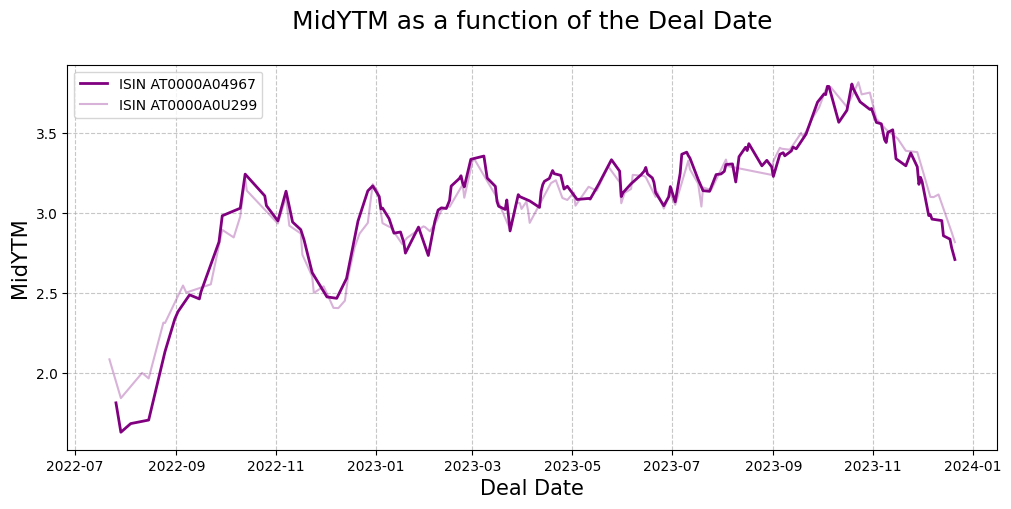

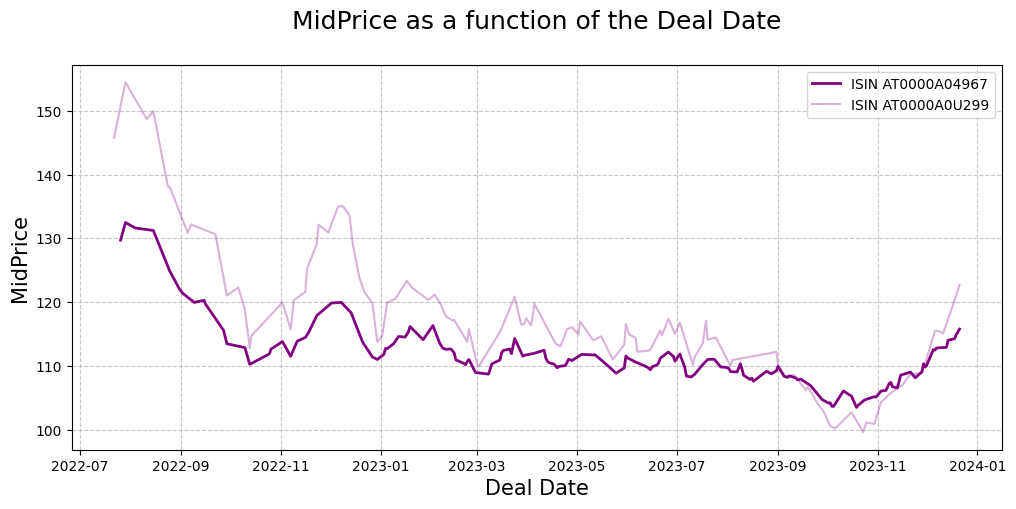

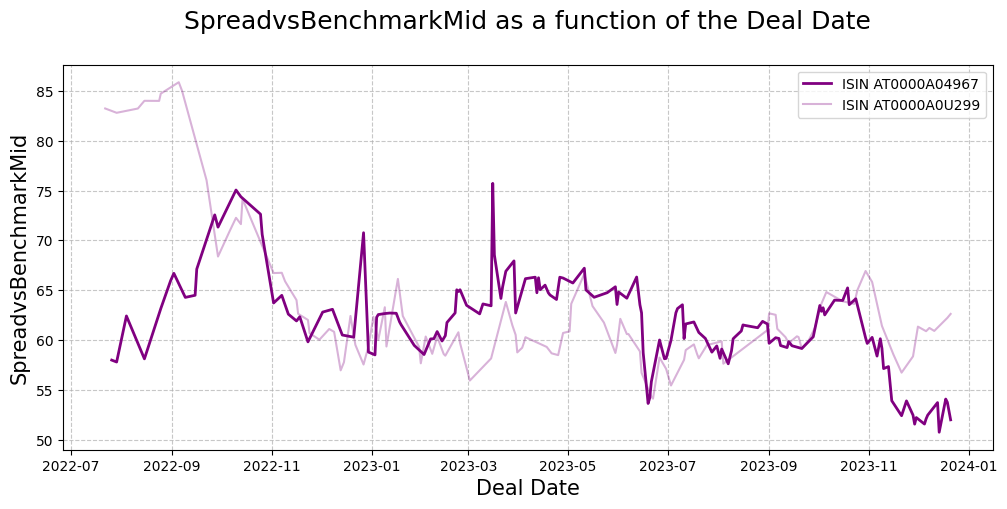

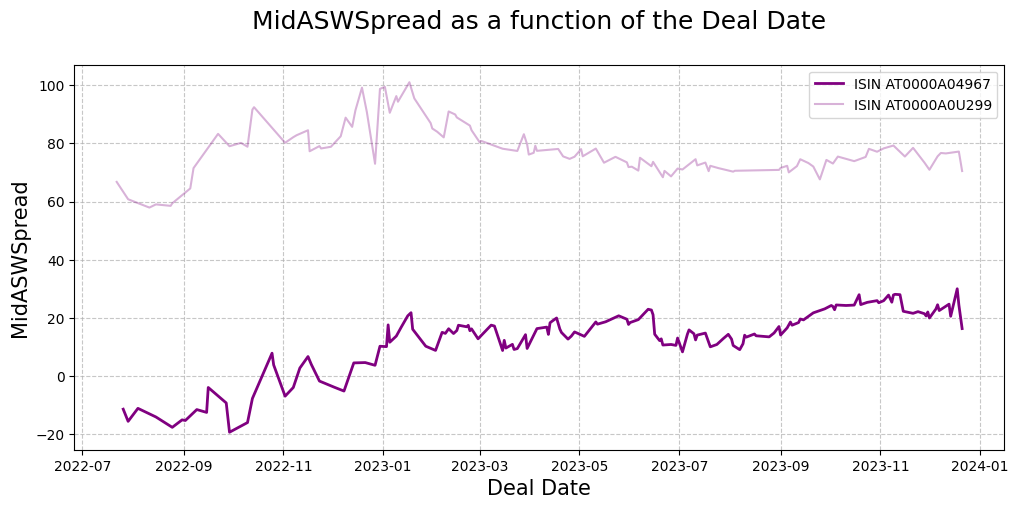

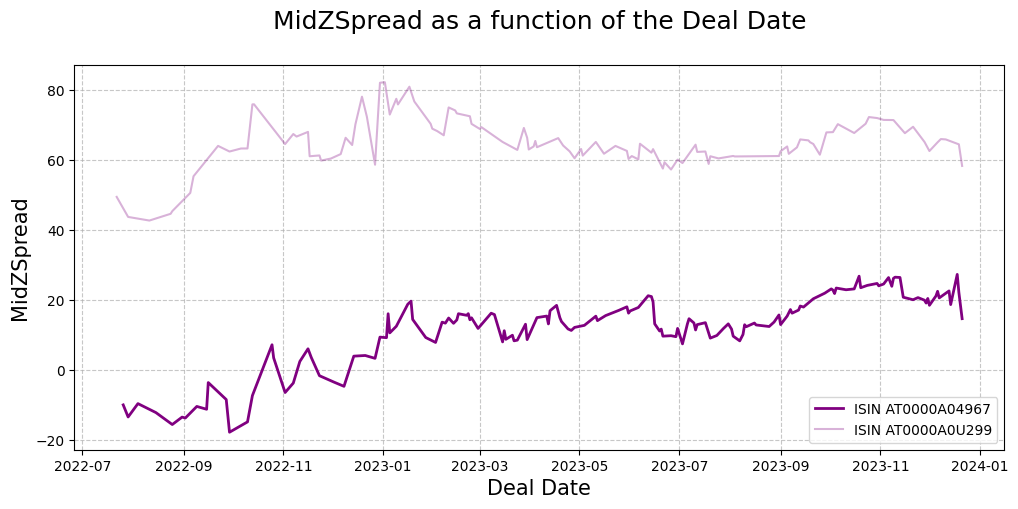

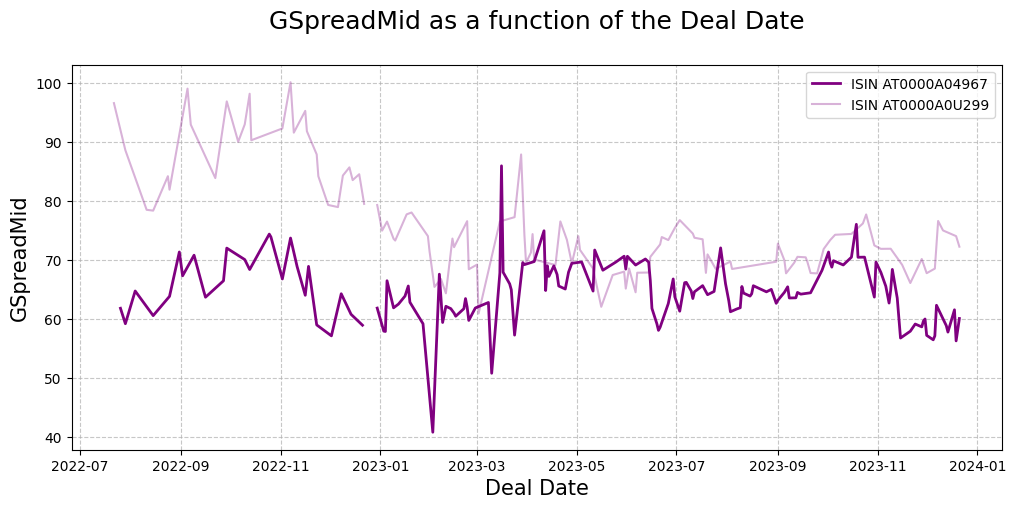

In [1138]:
# Run this function
columns_to_compare = ['MidYTM', 'MidPrice', 'SpreadvsBenchmarkMid', 'MidASWSpread',
                      'MidZSpread', 'GSpreadMid']

for feature in columns_to_compare :
    plot_double_GSpreadMid_evolution(df_preprocessed, ISIN_ex2, ISIN_ex4, column=feature) 